First of all, we import all the necessary libraries

In [1]:
!pip install greek-stemmer-pos
!pip install --upgrade smart_open gensim nltk
!pip install --upgrade preprocessing
!pip install torch numpy
!pip install gensim


  Obtaining dependency information for pytest-cov from https://files.pythonhosted.org/packages/a7/4b/8b78d126e275efa2379b1c2e09dc52cf70df16fc3b90613ef82531499d73/pytest_cov-4.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for coverage[toml]>=5.2.1 from https://files.pythonhosted.org/packages/94/1b/bd597a07755b233822760c9998d603218ca4b3151b6d5048e9fd0a5bf572/coverage-7.3.4-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.4/228.4 kB 10.8 MB/s eta 0:00:00
  Obtaining dependency information for smart_open from https://files.pythonhosted.org/packages/fc/d9/d97f1db64b09278aba64e8c81b5d322d436132df5741c518f3823824fae0/smart_open-6.4.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: smart_open
    Found existing ins

In [2]:
!pip install pandas

In [3]:
!pip install urllib3
!pip install -U Jinja2
!pip install numpy==1.23.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 47.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.7 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 14.0.1 which is incompatible.
chex 0.1.84 requires numpy>=1.24.1, but you have numpy 1.23.0 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pymc3 3.11.5 requires numpy<1.22

In [4]:
import pandas as pd


file_path = "/kaggle/input/ys19-2023-assignment-2/train_set.csv"
valid_path = "/kaggle/input/ys19-2023-assignment-2/valid_set.csv"

# Read the CSV files
data = pd.read_csv(file_path)
valid = pd.read_csv(valid_path)

In [5]:
data['hashtag_count'] = data['Text'].str.count('#')
result = data.groupby('Sentiment')['hashtag_count'].sum().reset_index()
print(result)


  Sentiment  hashtag_count
0  NEGATIVE          10962
1   NEUTRAL          12102
2  POSITIVE          11319


In [6]:
data['hashtag_count'] = data['Text'].str.count('@')
result = data.groupby('Sentiment')['hashtag_count'].sum().reset_index()
print(result)
data = data.drop('hashtag_count',axis=1)

  Sentiment  hashtag_count
0  NEGATIVE           6535
1   NEUTRAL           5577
2  POSITIVE           5760


First we will do all the preprocessing that we did in the first assginement, but this time we wont remove special characters, I think the results might be better

In [7]:
import re
data['Text'] = data['Text'].apply(lambda x: x.lower())
valid['Text'] = valid['Text'].apply(lambda x: x.lower())
greek_stopwords = [
    'και', 'το', 'η', 'της', 'του', 'τα', 'σε', 'με', 'για', 'ειναι',
    'στο', 'απο', 'που', 'οι', 'την', 'ενα', 'μετα', 'εχει', 'δεν',
    'ειναι', 'μια', 'αυτο', 'εναν', 'αλλα', 'ο', 'μη', 'οτι', 'πως',
    'απο', 'στην', 'στον', 'τι', 'αυτη', 'των', 'αυτα', 'οταν', 'πολυ',
    'μας', 'ειναι', 'πριν', 'οτι', 'μονο', 'αυτος', 'τοτε', 'μεταξυ',
    'πολλα', 'οποτε', 'παρα', 'εαν', 'γυρω', 'αυτην', 'εκεινος', 'περισσοτερο',
    'προς', 'πολυ', 'τελικα', 'ολοι'
]
def remove_stopwords(text):
    words = text.split()  # Split the text into words
    words = [word for word in words if word.lower() not in greek_stopwords]
    return ' '.join(words)
valid['Text'] = valid['Text'].apply(remove_stopwords)
data['Text'] = data['Text'].apply(remove_stopwords)
url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
def remove_urls(text):
    return re.sub(url_pattern, '', text)
valid['Text'] = valid['Text'].apply(remove_urls)
data['Text'] = data['Text'].apply(remove_urls)
data['Text'] = data['Text'].apply(lambda x: re.sub('ό', 'ο', x))  
data['Text'] = data['Text'].apply(lambda x: re.sub('έ', 'ε', x))  
data['Text'] = data['Text'].apply(lambda x: re.sub('ί', 'ι', x))  
data['Text'] = data['Text'].apply(lambda x: re.sub('ή', 'η', x))  
data['Text'] = data['Text'].apply(lambda x: re.sub('ύ', 'υ', x))  
data['Text'] = data['Text'].apply(lambda x: re.sub('ώ', 'ω', x))  
data['Text'] = data['Text'].apply(lambda x: re.sub('ά', 'α', x))  
data['Text'] = data['Text'].apply(lambda x: re.sub('ς', 'σ', x))  

valid['Text'] = valid['Text'].apply(lambda x: re.sub('ό', 'ο', x))  
valid['Text'] = valid['Text'].apply(lambda x: re.sub('έ', 'ε', x))  
valid['Text'] = valid['Text'].apply(lambda x: re.sub('ί', 'ι', x))  
valid['Text'] = valid['Text'].apply(lambda x: re.sub('ή', 'η', x))  
valid['Text'] = valid['Text'].apply(lambda x: re.sub('ύ', 'υ', x))  
valid['Text'] = valid['Text'].apply(lambda x: re.sub('ώ', 'ω', x))  
valid['Text'] = valid['Text'].apply(lambda x: re.sub('ά', 'α', x))  
valid['Text'] = valid['Text'].apply(lambda x: re.sub('ς', 'σ', x))

from greek_stemmer import stemmer

# Define a function to perform stemming on the tweets
def stem_greek_text(text):
    words = text.split()
    stemmed_words = [stemmer.stem_word(word,"NNN") for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text


# Apply the stem_greek_text function to the 'tweets' column
data['Text'] = data['Text'].apply(stem_greek_text)
valid['Text'] = valid['Text'].apply(stem_greek_text)
data['Text'] = data['Text'].apply(lambda x: x.lower())
valid['Text'] = valid['Text'].apply(lambda x: x.lower())
print(data.head(10))
print(valid.head(10))

   New_ID                                               Text Sentiment   Party
0   35027  #απολυμανση_κοριοι #απεντομωση_κοριοσ #απολυμα...   NEUTRAL  SYRIZA
1    9531  εξι νε επιστολ τ μακεδονι «καινε» τ νδ - μητσο...  NEGATIVE      ND
2   14146      ισχυρ κκε, δυναμ λα στ βουλ στ καθημεριν αγων  POSITIVE     KKE
3   28716  @five2nds @anthi7vas μνημονιακοτατ #μερα25 #εκ...   NEUTRAL     KKE
4   32886  @ai_katerina αυτ εινα συγκλονιστικ εινα ψυχασθ...   NEUTRAL  SYRIZA
5   12112  @tou_diaolou εχ δικιο, αντι να παιζ εαμ ελλασ,...  NEGATIVE  SYRIZA
6   13115                             προκλητικ ολ τσιπρ σκα  POSITIVE  SYRIZA
7   21431  @ksyrizohunter θ π "αλλιωσ"; μητσοτακ δηλως "ε...  POSITIVE      ND
8   12593  ραπισμ αντετοκουμπ υποκρισι μητσοτακη: εξι χρο...  POSITIVE      ND
9   19725  @nikospappas16 @atsipras @kmitsotakis ξερ τους...  POSITIVE      ND
   New_ID                                               Text Sentiment  \
0     435  @glinard @teza_tereza @adonisgeorgiadi @atsipr

This was the preproccesing we did for the first assginemnt, in this assignment we will also replace ς with σ, and replace special chracters with the special character and a blank space, so it can be tokenized

In [8]:
data['Text'] = data['Text'].str.replace('ς', 'σ')
valid['Text'] = valid['Text'].str.replace('ς', 'σ')
data['Text'] = data['Text'].apply(lambda x: re.sub(r'[^A-Za-zΑ-Ωα-ω0-9 ]', lambda y: ' ' + y.group(0) + ' ', x))
valid['Text'] = valid['Text'].apply(lambda x: re.sub(r'[^A-Za-zΑ-Ωα-ω0-9 ]', lambda y: ' ' + y.group(0) + ' ', x))
print(data.head(10))
print(valid.head(10))

   New_ID                                               Text Sentiment   Party
0   35027   # απολυμανση _ κοριοι  # απεντομωση _ κοριοσ ...   NEUTRAL  SYRIZA
1    9531  εξι νε επιστολ τ μακεδονι  « καινε »  τ νδ  - ...  NEGATIVE      ND
2   14146    ισχυρ κκε ,  δυναμ λα στ βουλ στ καθημεριν αγων  POSITIVE     KKE
3   28716   @ five2nds  @ anthi7vas μνημονιακοτατ  # μερα...   NEUTRAL     KKE
4   32886   @ ai _ katerina αυτ εινα συγκλονιστικ εινα ψυ...   NEUTRAL  SYRIZA
5   12112   @ tou _ diaolou εχ δικιο ,  αντι να παιζ εαμ ...  NEGATIVE  SYRIZA
6   13115                             προκλητικ ολ τσιπρ σκα  POSITIVE  SYRIZA
7   21431   @ ksyrizohunter θ π  " αλλιωσ "  ;  μητσοτακ ...  POSITIVE      ND
8   12593  ραπισμ αντετοκουμπ υποκρισι μητσοτακη :  εξι χ...  POSITIVE      ND
9   19725   @ nikospappas16  @ atsipras  @ kmitsotakis ξε...  POSITIVE      ND
   New_ID                                               Text Sentiment  \
0     435   @ glinard  @ teza _ tereza  @ adonisgeorgiadi

After that it owuld be better to remove spaces that are not needed

In [9]:
data['Text'] = data['Text'].apply(lambda x: re.sub(r'\s+', ' ', x))
valid['Text'] = valid['Text'].apply(lambda x: re.sub(r'\s+', ' ', x))

data.to_csv("data.csv", index=False)
valid.to_csv("valid.csv", index=False)
print(data.head(10))
print(valid.head(10))

   New_ID                                               Text Sentiment   Party
0   35027   # απολυμανση _ κοριοι # απεντομωση _ κοριοσ #...   NEUTRAL  SYRIZA
1    9531  εξι νε επιστολ τ μακεδονι « καινε » τ νδ - μητ...  NEGATIVE      ND
2   14146     ισχυρ κκε , δυναμ λα στ βουλ στ καθημεριν αγων  POSITIVE     KKE
3   28716   @ five2nds @ anthi7vas μνημονιακοτατ # μερα25...   NEUTRAL     KKE
4   32886   @ ai _ katerina αυτ εινα συγκλονιστικ εινα ψυ...   NEUTRAL  SYRIZA
5   12112   @ tou _ diaolou εχ δικιο , αντι να παιζ εαμ ε...  NEGATIVE  SYRIZA
6   13115                             προκλητικ ολ τσιπρ σκα  POSITIVE  SYRIZA
7   21431   @ ksyrizohunter θ π " αλλιωσ " ; μητσοτακ δηλ...  POSITIVE      ND
8   12593  ραπισμ αντετοκουμπ υποκρισι μητσοτακη : εξι χρ...  POSITIVE      ND
9   19725   @ nikospappas16 @ atsipras @ kmitsotakis ξερ ...  POSITIVE      ND
   New_ID                                               Text Sentiment  \
0     435   @ glinard @ teza _ tereza @ adonisgeorgiadi @

We also stored as csv our final cleaned data

I am going to use optuna to tune the hyperparameters, I will brek the full body of optuna in pieces for better understanding

First we read the clean data

In [10]:
import pandas as pd
valid = pd.read_csv("/kaggle/working/valid.csv")
data = pd.read_csv("/kaggle/working/data.csv")


This is our DataLoader that uses x_train and y_train that will be defined later, the definition of this class remains the same

In [11]:
import torch
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self):
        self.x=torch.from_numpy(x_train)
        self.y=torch.from_numpy(y_train)
        self.len=self.x.shape[0]
    def __getitem__(self,index):      
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len

This is a simple definition of the NN with just one hidden dimesnion, we will change this and try different approaches later

In [12]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(Net,self).__init__()
        self.linear1=nn.Linear(D_in,H)
        self.linear2=nn.Linear(H,D_out)

        
    def forward(self,x):
        x=torch.sigmoid(self.linear1(x))  
        x=self.linear2(x)
        return x

Use label encoder to encode Sentiments

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])
valid['Sentiment'] = label_encoder.fit_transform(valid['Sentiment'])

Define the word2vec model, different approaches will be tested afterwards

In [14]:
import nltk
from nltk.tokenize import word_tokenize
import gensim
from gensim.models import Word2Vec
input_dim = 100
nltk.download('punkt')
data['tokenized_text'] = data['Text'].apply(word_tokenize)
valid['tokenized_text'] = valid['Text'].apply(word_tokenize)
word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), vector_size=input_dim, window=5, min_count=1, workers=4)


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Since the text of each tweet has not a fixed size we will use the mean embedding to represent each tweet, we will check some different approaches later

In [15]:
import numpy as np
data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
data.head()

,New_ID,Text,Sentiment,Party,tokenized_text,mean_embedding
0,35027,# απολυμανση _ κοριοι # απεντομωση _ κοριοσ #...,1,SYRIZA,"[#, απολυμανση, _, κοριοι, #, απεντομωση, _, κ...","[-0.2660993, 0.38771376, 0.30157158, 0.6053943..."
1,9531,εξι νε επιστολ τ μακεδονι « καινε » τ νδ - μητ...,0,ND,"[εξι, νε, επιστολ, τ, μακεδονι, «, καινε, », τ...","[0.7498901, 0.033539865, -0.08454637, -0.50484..."
2,14146,"ισχυρ κκε , δυναμ λα στ βουλ στ καθημεριν αγων",2,KKE,"[ισχυρ, κκε, ,, δυναμ, λα, στ, βουλ, στ, καθημ...","[-0.46750936, 1.1662321, 0.20756933, -0.106002..."
3,28716,@ five2nds @ anthi7vas μνημονιακοτατ # μερα25...,1,KKE,"[@, five2nds, @, anthi7vas, μνημονιακοτατ, #, ...","[-1.4631376, 0.93277603, 0.116481006, 1.275122..."
4,32886,@ ai _ katerina αυτ εινα συγκλονιστικ εινα ψυ...,1,SYRIZA,"[@, ai, _, katerina, αυτ, εινα, συγκλονιστικ, ...","[-0.77877134, 0.043030836, -0.039665487, 0.795..."


Same for validation set

In [16]:
valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
valid.head()

,New_ID,Text,Sentiment,Party,tokenized_text,mean_embedding
0,435,@ glinard @ teza _ tereza @ adonisgeorgiadi @...,2,SYRIZA,"[@, glinard, @, teza, _, tereza, @, adonisgeor...","[-0.19958033, 0.30547684, -0.01944047, 0.52729..."
1,3061,τσιπρασ : ζητησαμ απο αντιπολιτευσ να συμμετεχ...,0,SYRIZA,"[τσιπρασ, :, ζητησαμ, απο, αντιπολιτευσ, να, σ...","[-0.11728642, 0.4991955, 0.093434975, 0.109933..."
2,2161,"σωστ ελληνασ , δημοκρατησ , ελλην εξωτερικ ερχ...",0,ND,"[σωστ, ελληνασ, ,, δημοκρατησ, ,, ελλην, εξωτε...","[-0.47808185, 0.42485306, -0.041567665, 0.7423..."
3,1271,@ 30 _ _ kai ναι βλεπ αυτ ενδιαφερ τουσ μητσο...,2,ND,"[@, 30, _, _, kai, ναι, βλεπ, αυτ, ενδιαφερ, τ...","[-0.12954354, 0.020736314, 0.0035473264, 0.411..."
4,4396,συνεντευξ μητσοτακ alpha : υπο αιρεσ 13η συντα...,1,ND,"[συνεντευξ, μητσοτακ, alpha, :, υπο, αιρεσ, 13...","[0.65131706, -0.08270162, 0.38664216, 0.177338..."


This is our train and validation sets, the way they are created remains unchanged

In [17]:
x_train = data['mean_embedding']
x_val = valid['mean_embedding']
y_val = valid['Sentiment']
y_train = data['Sentiment']

Convert to float type 

In [18]:
x_train = np.vstack(x_train).astype(np.float32)
x_val = np.vstack(x_val).astype(np.float32)

# Now x_train_np is a NumPy array with float32 elements
print(x_train.dtype)

float32


In [19]:
y_val = y_val.values
y_train = y_train.values
print(y_train)

[1 0 2 ... 1 0 1]


Create the dataset and data loader

In [20]:
data_set=Data()
trainloader=DataLoader(dataset=data_set,batch_size=64)

Get an insight of the data, since we are using mean embedding, the values are close to 0

In [21]:
data_set.x[1:10]

tensor([[ 7.4989e-01,  3.3540e-02, -8.4546e-02, -5.0484e-01,  7.6754e-02,
         -5.5329e-01,  5.1206e-01,  9.0051e-01, -7.2913e-01, -3.2155e-01,
         -1.2228e-01, -3.1287e-01,  2.9330e-01,  8.7970e-01,  1.5034e-01,
         -7.8413e-01, -7.9681e-02, -5.0368e-01, -1.1225e-01, -1.4270e+00,
          7.0529e-01,  3.0117e-01,  8.8501e-01,  3.3277e-01, -2.6973e-01,
         -6.6508e-01,  8.4934e-02, -1.1731e-01, -4.6263e-01,  5.2594e-01,
          6.7127e-01, -6.5310e-01,  4.8948e-01, -5.2458e-01, -4.8400e-01,
          1.2937e+00,  5.0512e-01,  6.5882e-01,  3.4679e-01, -1.5165e+00,
          4.6210e-02, -4.6174e-01, -8.0139e-01,  3.8962e-01,  2.8268e-01,
          2.4144e-03, -7.6588e-01, -1.1874e-01,  1.0550e+00,  4.7734e-01,
         -5.7921e-01, -3.9839e-01,  2.3553e-01,  4.2765e-01,  5.1989e-01,
          9.3723e-01, -2.1290e-01, -1.4168e-01, -7.9782e-01, -3.6919e-01,
          5.1111e-02, -4.7642e-01,  4.2305e-01, -1.9095e-01, -1.4556e+00,
          1.0295e+00,  2.2860e-01,  2.

Get an insight of the labels

In [22]:
data_set.y[1:10]

tensor([0, 2, 1, 1, 0, 2, 2, 2, 2])

Check that size of x and y are the same

In [23]:
data_set.x.shape, data_set.y.shape

(torch.Size([36630, 100]), torch.Size([36630]))

Define NN

In [24]:
input_dim=100     # how many Variables are in the dataset
hidden_dim = 25 # hidden layers
output_dim=3    # number of classes
model=Net(input_dim,hidden_dim,output_dim)

Define loss function, we will check others later

In [25]:
criterion=nn.CrossEntropyLoss()

Define learning rate and optimizer, we will check other values later

In [26]:
learning_rate=0.1

optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

Train model for 300 epochs, we will also check some other values later

In [27]:
n_epochs=300
loss_list=[]
early_stop_threshold = 0.01


#n_epochs
for epoch in range(n_epochs):
    for x, y in trainloader:

        #clear gradient 
        optimizer.zero_grad()
        #make a prediction 
        z=model.forward(x)
        loss=criterion(z,y)
        # calculate gradients of parameters 
        loss.backward()
        # update parameters 
        optimizer.step()
        
        loss_list.append(loss.data)

Feed the validation set to the model

In [28]:
x_val = torch.from_numpy(x_val)
z=model.forward(x_val)

Output is 3 values based on the idea of a Softmax Classifier, we chose the highest

In [29]:
z=model.forward(x_val)
max_indexes = torch.argmax(z, dim=1)

Convert to numpy so we can use the metrics for scoring from sklearn

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = max_indexes.numpy()

In [31]:
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the results
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1 Score: {f1:.5f}')

Accuracy: 0.38551
Precision: 0.39132
Recall: 0.38551
F1 Score: 0.37833


This was a simple example with 300 epochs

Before we continue with optuna we need to define the number of epochs, we need a reliable number but not something too large because optuna would take for ages, lets try 11 epochs

In [32]:
input_dim=100     # how many Variables are in the dataset
hidden_dim = 25 # hidden layers
output_dim=3    # number of classes
model=Net(input_dim,hidden_dim,output_dim)
criterion=nn.CrossEntropyLoss()

learning_rate=0.1
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
n_epochs=11
loss_list=[]

#n_epochs
for epoch in range(n_epochs):
    for x, y in trainloader:

        #clear gradient 
        optimizer.zero_grad()
        #make a prediction 
        z=model.forward(x)
        loss=criterion(z,y)
        # calculate gradients of parameters 
        loss.backward()
        # update parameters 
        optimizer.step()
        
        loss_list.append(loss.data)
z=model.forward(x_val)
max_indexes = torch.argmax(z, dim=1)
y_pred = max_indexes.numpy()
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the results
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1 Score: {f1:.5f}')

Accuracy: 0.37768
Precision: 0.38214
Recall: 0.37768
F1 Score: 0.36117


Nice, results are way faster and they are really close to 300 epochs, lets try to decrease it more, go with 5 epochs

In [33]:
input_dim=100     # how many Variables are in the dataset
hidden_dim = 25 # hidden layers
output_dim=3    # number of classes
model=Net(input_dim,hidden_dim,output_dim)
criterion=nn.CrossEntropyLoss()

learning_rate=0.1
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
n_epochs=5
loss_list=[]

#n_epochs
for epoch in range(n_epochs):
    for x, y in trainloader:

        #clear gradient 
        optimizer.zero_grad()
        #make a prediction 
        z=model.forward(x)
        loss=criterion(z,y)
        # calculate gradients of parameters 
        loss.backward()
        # update parameters 
        optimizer.step()
        
        loss_list.append(loss.data)
z=model.forward(x_val)
max_indexes = torch.argmax(z, dim=1)
y_pred = max_indexes.numpy()
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the results
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1 Score: {f1:.5f}')

Accuracy: 0.37003
Precision: 0.38049
Recall: 0.37003
F1 Score: 0.34679


Too low, we will keep 11 epochs

Now we proceed to the hyperparameters tuning section

The main idea behind this step is to optimize the following parameters : input_dim (size of embedding),window, hidden_dim, batch_size and learning_rate 

What remains same same here is the model (number of hidden layers and dimension), the representation of each tweet (mean embedding) and number of epochs, criterion and optimizer, we will alter them in next steps

In [34]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
num_cores = multiprocessing.cpu_count()
n_epochs=11
criterion=nn.CrossEntropyLoss()


class Data(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim

    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]

    def __len__(self):
        return self.len

class Net(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(Net,self).__init__()
        self.linear1=nn.Linear(D_in,H)
        self.linear2=nn.Linear(H,D_out)

        
    def forward(self,x):
        x=torch.sigmoid(self.linear1(x))  
        x=self.linear2(x)
        return x
    
def objective(trial):
    input_dim = trial.suggest_int('input_dim', 50, 200)
    hidden_dim = trial.suggest_int('hidden_dim', 10, 50)
    window_size = trial.suggest_int('window_size', 3, 10)
    b_size = trial.suggest_int('b_size', 32, 128)
    learning_rate = trial.suggest_float('learning_rate', 1e-2, 1, log=True)
    model = Net(input_dim, hidden_dim, output_dim)
    optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
    # Choose optimizer
    
    

    word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), vector_size=input_dim, window=window_size, min_count=1, workers=num_cores)
    
    data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    x_train = data['mean_embedding']
    x_val = valid['mean_embedding']
    y_val = valid['Sentiment']
    y_train = data['Sentiment']
    
    x_train = np.vstack(x_train).astype(np.float32)
    x_val = np.vstack(x_val).astype(np.float32)
    
    
    y_val = y_val.values
    y_train = y_train.values
    

    data_set = Data(x_train, y_train, input_dim)
    trainloader = DataLoader(dataset=data_set, batch_size=b_size, shuffle=True)
   
    loss_list = []

    for epoch in range(n_epochs):
        for x, y in trainloader:
            optimizer.zero_grad()
            z = model.forward(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            
            loss_list.append(loss.item())

    x_val_tensor = torch.from_numpy(x_val)
    z_val = model.forward(x_val_tensor)
    max_indexes = torch.argmax(z_val, dim=1)
    y_pred = max_indexes.numpy()

    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Set up Optuna study
study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)

# Get the best parameters
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

[I 2023-12-22 12:36:17,703] A new study created in memory with name: no-name-1564f740-16f4-4213-87ae-52c8e4acc16a
[I 2023-12-22 12:36:36,213] Trial 0 finished with value: 0.37786697247706424 and parameters: {'input_dim': 106, 'hidden_dim': 48, 'window_size': 8, 'b_size': 90, 'learning_rate': 0.020513382630874502}. Best is trial 0 with value: 0.37786697247706424.
[I 2023-12-22 12:36:53,380] Trial 1 finished with value: 0.3918195718654434 and parameters: {'input_dim': 73, 'hidden_dim': 12, 'window_size': 9, 'b_size': 90, 'learning_rate': 0.2607024758370766}. Best is trial 1 with value: 0.3918195718654434.
[I 2023-12-22 12:37:13,289] Trial 2 finished with value: 0.378631498470948 and parameters: {'input_dim': 53, 'hidden_dim': 49, 'window_size': 9, 'b_size': 52, 'learning_rate': 0.02310201887845294}. Best is trial 1 with value: 0.3918195718654434.
[I 2023-12-22 12:37:32,160] Trial 3 finished with value: 0.3761467889908257 and parameters: {'input_dim': 77, 'hidden_dim': 22, 'window_size': 

Best Hyperparameters: {'input_dim': 76, 'hidden_dim': 29, 'window_size': 8, 'b_size': 96, 'learning_rate': 0.26553396204071694}
Best Accuracy: 0.3958333333333333


Now we will check how many hidden layers to use, we will use the same idea behind optuna and try 3 and 5 hidden layers, we also define some functions to make coding easier

In [35]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
from torch.nn import functional as F
num_cores = multiprocessing.cpu_count()
n_epochs=11
criterion=nn.CrossEntropyLoss()


class Data(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim

    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]

    def __len__(self):
        return self.len

class Net(nn.Module):
    def __init__(self, D_in, H1, H2, H3, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.bn1 = nn.BatchNorm1d(H1)
        self.linear2 = nn.Linear(H1, H2)
        self.bn2 = nn.BatchNorm1d(H2)
        self.linear3 = nn.Linear(H2, H3)
        self.bn3 = nn.BatchNorm1d(H3)
        self.linear4 = nn.Linear(H3, D_out)

    def forward(self, x):
        x = F.relu(self.bn1(self.linear1(x)))
        x = F.relu(self.bn2(self.linear2(x)))
        x = F.relu(self.bn3(self.linear3(x)))
        x = self.linear4(x)
        return x

def train_model(model, trainloader, optimizer, criterion):
    model.train()
    for x, y in trainloader:
        optimizer.zero_grad()
        z = model.forward(x)
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
def evaluate_model(model, x_val, y_val):
    model.eval()
    with torch.no_grad():
        z_val = model.forward(x_val)
        max_indexes = torch.argmax(z_val, dim=1)
        y_pred = max_indexes.numpy()
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

def objective(trial):
    input_dim = trial.suggest_int('input_dim', 50, 200)
    hidden_dim = trial.suggest_int('hidden_dim', 10, 50)
    window_size = trial.suggest_int('window_size', 3, 10)
    b_size = trial.suggest_int('b_size', 32, 128)
    learning_rate = trial.suggest_float('learning_rate', 1e-2, 1, log=True)
    model = Net(input_dim, 3*hidden_dim, 2*hidden_dim, hidden_dim, 3)
    optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
    # Choose optimizer
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)  # Dynamic learning rate
    

    word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), vector_size=input_dim, window=window_size, min_count=1, workers=num_cores)
    
    data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    x_train = data['mean_embedding']
    x_val = valid['mean_embedding']
    y_val = valid['Sentiment']
    y_train = data['Sentiment']
    
    x_train = np.vstack(x_train).astype(np.float32)
    x_val = np.vstack(x_val).astype(np.float32)
    
    
    y_val = y_val.values
    y_train = y_train.values
    

    data_set = Data(x_train, y_train, input_dim)
    trainloader = DataLoader(dataset=data_set, batch_size=b_size, shuffle=True)
   
    accuracy_list = []

    for epoch in range(n_epochs):
        train_model(model, trainloader, optimizer, criterion)
        scheduler.step()  # Adjust the learning rate dynamically
        accuracy = evaluate_model(model, torch.from_numpy(x_val), y_val)
        accuracy_list.append(accuracy)

    return np.mean(accuracy_list)

# Set up Optuna study
study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)

# Get the best parameters
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

[I 2023-12-22 12:51:29,026] A new study created in memory with name: no-name-b9250b15-813d-408e-b518-50080e077682
[I 2023-12-22 12:51:51,788] Trial 0 finished with value: 0.3891784820683904 and parameters: {'input_dim': 106, 'hidden_dim': 48, 'window_size': 8, 'b_size': 90, 'learning_rate': 0.020513382630874502}. Best is trial 0 with value: 0.3891784820683904.
[I 2023-12-22 12:52:12,670] Trial 1 finished with value: 0.39055115373922716 and parameters: {'input_dim': 73, 'hidden_dim': 12, 'window_size': 9, 'b_size': 90, 'learning_rate': 0.2607024758370766}. Best is trial 1 with value: 0.39055115373922716.
[I 2023-12-22 12:52:39,977] Trial 2 finished with value: 0.38778843480678343 and parameters: {'input_dim': 53, 'hidden_dim': 49, 'window_size': 9, 'b_size': 52, 'learning_rate': 0.02310201887845294}. Best is trial 1 with value: 0.39055115373922716.
[I 2023-12-22 12:53:03,509] Trial 3 finished with value: 0.3890394773422297 and parameters: {'input_dim': 77, 'hidden_dim': 22, 'window_size

Best Hyperparameters: {'input_dim': 151, 'hidden_dim': 14, 'window_size': 7, 'b_size': 110, 'learning_rate': 0.08691686968694587}
Best Accuracy: 0.3963893522379761


Same as above but with 5 hidden layers

In [36]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
from torch.nn import functional as F
num_cores = multiprocessing.cpu_count()
n_epochs=11
criterion=nn.CrossEntropyLoss()


class Data(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim

    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]

    def __len__(self):
        return self.len

class Net(nn.Module):
    def __init__(self, D_in, H1, H2, H3, H4, H5, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.bn1 = nn.BatchNorm1d(H1)
        self.linear2 = nn.Linear(H1, H2)
        self.bn2 = nn.BatchNorm1d(H2)
        self.linear3 = nn.Linear(H2, H3)
        self.bn3 = nn.BatchNorm1d(H3)
        self.linear4 = nn.Linear(H3, H4)
        self.bn4 = nn.BatchNorm1d(H4)
        self.linear5 = nn.Linear(H4, H5)
        self.bn5 = nn.BatchNorm1d(H5)
        self.linear6 = nn.Linear(H5, D_out)

    def forward(self, x):
        x = F.relu(self.bn1(self.linear1(x)))
        x = F.relu(self.bn2(self.linear2(x)))
        x = F.relu(self.bn3(self.linear3(x)))
        x = F.relu(self.bn4(self.linear4(x)))
        x = F.relu(self.bn5(self.linear5(x)))
        x = self.linear6(x)
        return x

def train_model(model, trainloader, optimizer, criterion):
    model.train()
    for x, y in trainloader:
        optimizer.zero_grad()
        z = model.forward(x)
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
def evaluate_model(model, x_val, y_val):
    model.eval()
    with torch.no_grad():
        z_val = model.forward(x_val)
        max_indexes = torch.argmax(z_val, dim=1)
        y_pred = max_indexes.numpy()
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

def objective(trial):
    input_dim = trial.suggest_int('input_dim', 50, 200)
    hidden_dim = trial.suggest_int('hidden_dim', 6, 30)
    window_size = trial.suggest_int('window_size', 3, 10)
    b_size = trial.suggest_int('b_size', 32, 128)
    learning_rate = trial.suggest_float('learning_rate', 1e-2, 1, log=True)
    model = Net(input_dim, 5 * hidden_dim, 4 * hidden_dim, 3*hidden_dim, 2 * hidden_dim, hidden_dim, 3)
    optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
    # Choose optimizer
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)  # Dynamic learning rate
    

    word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), vector_size=input_dim, window=window_size, min_count=1, workers=num_cores)
    
    data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    x_train = data['mean_embedding']
    x_val = valid['mean_embedding']
    y_val = valid['Sentiment']
    y_train = data['Sentiment']
    
    x_train = np.vstack(x_train).astype(np.float32)
    x_val = np.vstack(x_val).astype(np.float32)
    
    
    y_val = y_val.values
    y_train = y_train.values
    

    data_set = Data(x_train, y_train, input_dim)
    trainloader = DataLoader(dataset=data_set, batch_size=b_size, shuffle=True)
   
    accuracy_list = []

    for epoch in range(n_epochs):
        train_model(model, trainloader, optimizer, criterion)
        scheduler.step()  # Adjust the learning rate dynamically
        accuracy = evaluate_model(model, torch.from_numpy(x_val), y_val)
        accuracy_list.append(accuracy)

    return np.mean(accuracy_list)

# Set up Optuna study
study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)

# Get the best parameters
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

[I 2023-12-22 13:11:05,677] A new study created in memory with name: no-name-ef3ae538-6041-4cfd-b825-032897169c12
[I 2023-12-22 13:11:32,443] Trial 0 finished with value: 0.37943077564637195 and parameters: {'input_dim': 106, 'hidden_dim': 29, 'window_size': 8, 'b_size': 90, 'learning_rate': 0.020513382630874502}. Best is trial 0 with value: 0.37943077564637195.
[I 2023-12-22 13:11:55,994] Trial 1 finished with value: 0.3807339449541285 and parameters: {'input_dim': 73, 'hidden_dim': 7, 'window_size': 9, 'b_size': 90, 'learning_rate': 0.2607024758370766}. Best is trial 1 with value: 0.3807339449541285.
[I 2023-12-22 13:12:30,030] Trial 2 finished with value: 0.3783013622463164 and parameters: {'input_dim': 53, 'hidden_dim': 30, 'window_size': 9, 'b_size': 52, 'learning_rate': 0.02310201887845294}. Best is trial 1 with value: 0.3807339449541285.
[I 2023-12-22 13:12:56,442] Trial 3 finished with value: 0.37972616068946347 and parameters: {'input_dim': 77, 'hidden_dim': 13, 'window_size':

Best Hyperparameters: {'input_dim': 99, 'hidden_dim': 22, 'window_size': 5, 'b_size': 94, 'learning_rate': 0.07016309281476811}
Best Accuracy: 0.3916110647762024


Interesting, the best results were with the first approach with just one hidden layer that was using sigmoid, lets try relu with one layer to check which is better

In the examples with 3 and 5 hidden layers relu was used, perhaps the fact that we didnt get any benefit using more layers was due to using relu instead of sigmoid, lets check

In [37]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
num_cores = multiprocessing.cpu_count()
n_epochs=11
criterion=nn.CrossEntropyLoss()


class Data(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim

    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]

    def __len__(self):
        return self.len

class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.bn1 = nn.BatchNorm1d(H)
        self.linear2 = nn.Linear(H, D_out)

    def forward(self, x):
        x = F.relu(self.bn1(self.linear1(x)))
        x = self.linear2(x)
        return x
    
def objective(trial):
    input_dim = trial.suggest_int('input_dim', 50, 200)
    hidden_dim = trial.suggest_int('hidden_dim', 10, 50)
    window_size = trial.suggest_int('window_size', 3, 10)
    b_size = trial.suggest_int('b_size', 32, 128)
    learning_rate = trial.suggest_float('learning_rate', 1e-2, 1, log=True)
    model = Net(input_dim, hidden_dim, output_dim)
    optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
    # Choose optimizer
    
    

    word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), vector_size=input_dim, window=window_size, min_count=1, workers=num_cores)
    
    data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    x_train = data['mean_embedding']
    x_val = valid['mean_embedding']
    y_val = valid['Sentiment']
    y_train = data['Sentiment']
    
    x_train = np.vstack(x_train).astype(np.float32)
    x_val = np.vstack(x_val).astype(np.float32)
    
    
    y_val = y_val.values
    y_train = y_train.values
    

    data_set = Data(x_train, y_train, input_dim)
    trainloader = DataLoader(dataset=data_set, batch_size=b_size, shuffle=True)
   
    loss_list = []

    for epoch in range(n_epochs):
        for x, y in trainloader:
            optimizer.zero_grad()
            z = model.forward(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            
            loss_list.append(loss.item())

    x_val_tensor = torch.from_numpy(x_val)
    z_val = model.forward(x_val_tensor)
    max_indexes = torch.argmax(z_val, dim=1)
    y_pred = max_indexes.numpy()

    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Set up Optuna study
study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)

# Get the best parameters
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

[I 2023-12-22 13:36:09,718] A new study created in memory with name: no-name-17adffe1-3adc-4191-bee2-c2c3f4bec499
[I 2023-12-22 13:36:27,975] Trial 0 finished with value: 0.3876146788990826 and parameters: {'input_dim': 106, 'hidden_dim': 48, 'window_size': 8, 'b_size': 90, 'learning_rate': 0.020513382630874502}. Best is trial 0 with value: 0.3876146788990826.
[I 2023-12-22 13:36:45,749] Trial 1 finished with value: 0.3797782874617737 and parameters: {'input_dim': 73, 'hidden_dim': 12, 'window_size': 9, 'b_size': 90, 'learning_rate': 0.2607024758370766}. Best is trial 0 with value: 0.3876146788990826.
[I 2023-12-22 13:37:06,874] Trial 2 finished with value: 0.3849388379204893 and parameters: {'input_dim': 53, 'hidden_dim': 49, 'window_size': 9, 'b_size': 52, 'learning_rate': 0.02310201887845294}. Best is trial 0 with value: 0.3876146788990826.
[I 2023-12-22 13:37:25,735] Trial 3 finished with value: 0.38952599388379205 and parameters: {'input_dim': 77, 'hidden_dim': 22, 'window_size': 

Best Hyperparameters: {'input_dim': 60, 'hidden_dim': 23, 'window_size': 4, 'b_size': 56, 'learning_rate': 0.1375385552240261}
Best Accuracy: 0.3983180428134557


We got an even better result using relu and one hidden layer, so using this NN we will try to use adam optimizer instead

In [38]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
num_cores = multiprocessing.cpu_count()
n_epochs=11
criterion=nn.CrossEntropyLoss()


class Data(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim

    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]

    def __len__(self):
        return self.len

class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.bn1 = nn.BatchNorm1d(H)
        self.linear2 = nn.Linear(H, D_out)

    def forward(self, x):
        x = F.relu(self.bn1(self.linear1(x)))
        x = self.linear2(x)
        return x
    
def objective(trial):
    input_dim = trial.suggest_int('input_dim', 50, 200)
    hidden_dim = trial.suggest_int('hidden_dim', 10, 50)
    window_size = trial.suggest_int('window_size', 3, 10)
    b_size = trial.suggest_int('b_size', 32, 128)
    learning_rate = trial.suggest_float('learning_rate', 1e-2, 1, log=True)
    model = Net(input_dim, hidden_dim, output_dim)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
    # Choose optimizer
    
    

    word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), vector_size=input_dim, window=window_size, min_count=1, workers=num_cores)
    
    data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    x_train = data['mean_embedding']
    x_val = valid['mean_embedding']
    y_val = valid['Sentiment']
    y_train = data['Sentiment']
    
    x_train = np.vstack(x_train).astype(np.float32)
    x_val = np.vstack(x_val).astype(np.float32)
    
    
    y_val = y_val.values
    y_train = y_train.values
    

    data_set = Data(x_train, y_train, input_dim)
    trainloader = DataLoader(dataset=data_set, batch_size=b_size, shuffle=True)
   
    loss_list = []

    for epoch in range(n_epochs):
        for x, y in trainloader:
            optimizer.zero_grad()
            z = model.forward(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            
            loss_list.append(loss.item())

    x_val_tensor = torch.from_numpy(x_val)
    z_val = model.forward(x_val_tensor)
    max_indexes = torch.argmax(z_val, dim=1)
    y_pred = max_indexes.numpy()

    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Set up Optuna study
study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)

# Get the best parameters
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

[I 2023-12-22 13:53:14,418] A new study created in memory with name: no-name-9159c315-acd8-40d6-a8a4-8fb8ff1abd24
[I 2023-12-22 13:53:34,946] Trial 0 finished with value: 0.3900993883792049 and parameters: {'input_dim': 106, 'hidden_dim': 48, 'window_size': 8, 'b_size': 90, 'learning_rate': 0.020513382630874502}. Best is trial 0 with value: 0.3900993883792049.
[I 2023-12-22 13:53:56,386] Trial 1 finished with value: 0.3333333333333333 and parameters: {'input_dim': 73, 'hidden_dim': 12, 'window_size': 9, 'b_size': 90, 'learning_rate': 0.2607024758370766}. Best is trial 0 with value: 0.3900993883792049.
[I 2023-12-22 13:54:21,749] Trial 2 finished with value: 0.3486238532110092 and parameters: {'input_dim': 53, 'hidden_dim': 49, 'window_size': 9, 'b_size': 52, 'learning_rate': 0.02310201887845294}. Best is trial 0 with value: 0.3900993883792049.
[I 2023-12-22 13:54:43,397] Trial 3 finished with value: 0.3830275229357798 and parameters: {'input_dim': 77, 'hidden_dim': 22, 'window_size': 7

Best Hyperparameters: {'input_dim': 120, 'hidden_dim': 33, 'window_size': 5, 'b_size': 108, 'learning_rate': 0.01648801454235388}
Best Accuracy: 0.39353975535168195


Very close to SGD but not better, perhaps we should increase number of epochs for better convergance, but since we dont care about time but precision, we keep SGD

We will try NLLLoss, we need to also adapt our network to use log softmax

In [39]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
num_cores = multiprocessing.cpu_count()
n_epochs=11
criterion=nn.NLLLoss()


class Data(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim

    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]

    def __len__(self):
        return self.len

class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.bn1 = nn.BatchNorm1d(H)
        self.linear2 = nn.Linear(H, D_out)

    def forward(self, x):
        x = F.relu(self.bn1(self.linear1(x)))
        x = self.linear2(x)
        return F.log_softmax(x, dim=1)
    
def objective(trial):
    input_dim = trial.suggest_int('input_dim', 50, 200)
    hidden_dim = trial.suggest_int('hidden_dim', 10, 50)
    window_size = trial.suggest_int('window_size', 3, 10)
    b_size = trial.suggest_int('b_size', 32, 128)
    learning_rate = trial.suggest_float('learning_rate', 1e-2, 1, log=True)
    model = Net(input_dim, hidden_dim, output_dim)
    optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
    # Choose optimizer
    
    

    word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), vector_size=input_dim, window=window_size, min_count=1, workers=num_cores)
    
    data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    x_train = data['mean_embedding']
    x_val = valid['mean_embedding']
    y_val = valid['Sentiment']
    y_train = data['Sentiment']
    
    x_train = np.vstack(x_train).astype(np.float32)
    x_val = np.vstack(x_val).astype(np.float32)
    
    
    y_val = y_val.values
    y_train = y_train.values
    

    data_set = Data(x_train, y_train, input_dim)
    trainloader = DataLoader(dataset=data_set, batch_size=b_size, shuffle=True)
   
    loss_list = []

    for epoch in range(n_epochs):
        for x, y in trainloader:
            optimizer.zero_grad()
            z = model.forward(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            
            loss_list.append(loss.item())

    x_val_tensor = torch.from_numpy(x_val)
    z_val = model.forward(x_val_tensor)
    max_indexes = torch.argmax(z_val, dim=1)
    y_pred = max_indexes.numpy()

    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Set up Optuna study
study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)

# Get the best parameters
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

[I 2023-12-22 14:12:54,101] A new study created in memory with name: no-name-aa094965-b52d-4b2e-90a2-092756220e72
[I 2023-12-22 14:13:12,968] Trial 0 finished with value: 0.39506880733944955 and parameters: {'input_dim': 106, 'hidden_dim': 48, 'window_size': 8, 'b_size': 90, 'learning_rate': 0.020513382630874502}. Best is trial 0 with value: 0.39506880733944955.
[I 2023-12-22 14:13:30,741] Trial 1 finished with value: 0.3881880733944954 and parameters: {'input_dim': 73, 'hidden_dim': 12, 'window_size': 9, 'b_size': 90, 'learning_rate': 0.2607024758370766}. Best is trial 0 with value: 0.39506880733944955.
[I 2023-12-22 14:13:51,486] Trial 2 finished with value: 0.389717125382263 and parameters: {'input_dim': 53, 'hidden_dim': 49, 'window_size': 9, 'b_size': 52, 'learning_rate': 0.02310201887845294}. Best is trial 0 with value: 0.39506880733944955.
[I 2023-12-22 14:14:10,425] Trial 3 finished with value: 0.38952599388379205 and parameters: {'input_dim': 77, 'hidden_dim': 22, 'window_size

Best Hyperparameters: {'input_dim': 164, 'hidden_dim': 40, 'window_size': 3, 'b_size': 56, 'learning_rate': 0.03942864254943263}
Best Accuracy: 0.40424311926605505


Pretty close but not better

Also try MultiMargin

In [40]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
num_cores = multiprocessing.cpu_count()
n_epochs=11
criterion=nn.MultiMarginLoss()


class Data(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim

    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]

    def __len__(self):
        return self.len

class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.bn1 = nn.BatchNorm1d(H)
        self.linear2 = nn.Linear(H, D_out)

    def forward(self, x):
        x = F.relu(self.bn1(self.linear1(x)))
        x = self.linear2(x)
        x = F.softmax(x, dim=1)
        return x
    
def objective(trial):
    input_dim = trial.suggest_int('input_dim', 50, 200)
    hidden_dim = trial.suggest_int('hidden_dim', 10, 50)
    window_size = trial.suggest_int('window_size', 3, 10)
    b_size = trial.suggest_int('b_size', 32, 128)
    learning_rate = trial.suggest_float('learning_rate', 1e-2, 1, log=True)
    model = Net(input_dim, hidden_dim, output_dim)
    optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
    # Choose optimizer
    
    

    word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), vector_size=input_dim, window=window_size, min_count=1, workers=num_cores)
    
    data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    x_train = data['mean_embedding']
    x_val = valid['mean_embedding']
    y_val = valid['Sentiment']
    y_train = data['Sentiment']
    
    x_train = np.vstack(x_train).astype(np.float32)
    x_val = np.vstack(x_val).astype(np.float32)
    
    
    y_val = y_val.values
    y_train = y_train.values
    

    data_set = Data(x_train, y_train, input_dim)
    trainloader = DataLoader(dataset=data_set, batch_size=b_size, shuffle=True)
   
    loss_list = []

    for epoch in range(n_epochs):
        for x, y in trainloader:
            optimizer.zero_grad()
            z = model.forward(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            
            loss_list.append(loss.item())

    x_val_tensor = torch.from_numpy(x_val)
    z_val = model.forward(x_val_tensor)
    max_indexes = torch.argmax(z_val, dim=1)
    y_pred = max_indexes.numpy()

    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Set up Optuna study
study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)

# Get the best parameters
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

[I 2023-12-22 14:29:47,240] A new study created in memory with name: no-name-3e395dec-cf5b-45b3-a244-b7f1a0987cc6
[I 2023-12-22 14:30:05,628] Trial 0 finished with value: 0.4004204892966361 and parameters: {'input_dim': 106, 'hidden_dim': 48, 'window_size': 8, 'b_size': 90, 'learning_rate': 0.020513382630874502}. Best is trial 0 with value: 0.4004204892966361.
[I 2023-12-22 14:30:23,230] Trial 1 finished with value: 0.3977446483180428 and parameters: {'input_dim': 73, 'hidden_dim': 12, 'window_size': 9, 'b_size': 90, 'learning_rate': 0.2607024758370766}. Best is trial 0 with value: 0.4004204892966361.
[I 2023-12-22 14:30:44,341] Trial 2 finished with value: 0.39793577981651373 and parameters: {'input_dim': 53, 'hidden_dim': 49, 'window_size': 9, 'b_size': 52, 'learning_rate': 0.02310201887845294}. Best is trial 0 with value: 0.4004204892966361.
[I 2023-12-22 14:31:03,738] Trial 3 finished with value: 0.40156727828746175 and parameters: {'input_dim': 77, 'hidden_dim': 22, 'window_size':

Best Hyperparameters: {'input_dim': 141, 'hidden_dim': 16, 'window_size': 3, 'b_size': 124, 'learning_rate': 0.8536189862866826}
Best Accuracy: 0.40424311926605505


We got better accuracy using MultiMarginLoss, we keep it

Next we try to also include weight decay, we will use optuna to tune this hyperaparameter keeping the rest of the hyperparameters as above

In [41]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
from torch.nn import functional as F
num_cores = multiprocessing.cpu_count()
n_epochs=11
criterion=nn.MultiMarginLoss()


class Data(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim

    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]

    def __len__(self):
        return self.len

class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.bn1 = nn.BatchNorm1d(H)
        self.linear2 = nn.Linear(H, D_out)

    def forward(self, x):
        x = F.relu(self.bn1(self.linear1(x)))
        x = self.linear2(x)
        x = F.softmax(x, dim=1)
        return x
    
def objective(trial):
    input_dim = trial.suggest_int('input_dim', 50, 200)
    hidden_dim = trial.suggest_int('hidden_dim', 10, 50)
    window_size = trial.suggest_int('window_size', 3, 10)
    b_size = trial.suggest_int('b_size', 32, 128)
    learning_rate = trial.suggest_float('learning_rate', 1e-2, 1, log=True)
    weight_decay_new = trial.suggest_float('weight_decay_new', 1e-4, 1, log=True)
    model = Net(input_dim, hidden_dim, output_dim)
    optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate,weight_decay=weight_decay_new)
    # Choose optimizer
    
    

    word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), vector_size=input_dim, window=window_size, min_count=1, workers=num_cores)
    
    data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    x_train = data['mean_embedding']
    x_val = valid['mean_embedding']
    y_val = valid['Sentiment']
    y_train = data['Sentiment']
    
    x_train = np.vstack(x_train).astype(np.float32)
    x_val = np.vstack(x_val).astype(np.float32)
    
    
    y_val = y_val.values
    y_train = y_train.values
    

    data_set = Data(x_train, y_train, input_dim)
    trainloader = DataLoader(dataset=data_set, batch_size=b_size, shuffle=True)
   
    loss_list = []

    for epoch in range(n_epochs):
        for x, y in trainloader:
            optimizer.zero_grad()
            z = model.forward(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            
            loss_list.append(loss.item())

    x_val_tensor = torch.from_numpy(x_val)
    z_val = model.forward(x_val_tensor)
    max_indexes = torch.argmax(z_val, dim=1)
    y_pred = max_indexes.numpy()

    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Set up Optuna study
study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)

# Get the best parameters
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

[I 2023-12-22 14:46:03,576] A new study created in memory with name: no-name-10cb47ef-248a-4b61-8f58-46288c9a069c
[I 2023-12-22 14:46:22,474] Trial 0 finished with value: 0.3948776758409786 and parameters: {'input_dim': 106, 'hidden_dim': 48, 'window_size': 8, 'b_size': 90, 'learning_rate': 0.020513382630874502, 'weight_decay_new': 0.0004207053950287938}. Best is trial 0 with value: 0.3948776758409786.
[I 2023-12-22 14:46:40,781] Trial 1 finished with value: 0.3333333333333333 and parameters: {'input_dim': 58, 'hidden_dim': 45, 'window_size': 7, 'b_size': 100, 'learning_rate': 0.010994335574766204, 'weight_decay_new': 0.7579479953348001}. Best is trial 0 with value: 0.3948776758409786.
[I 2023-12-22 14:47:03,925] Trial 2 finished with value: 0.37920489296636084 and parameters: {'input_dim': 175, 'hidden_dim': 18, 'window_size': 4, 'b_size': 49, 'learning_rate': 0.04059611610484305, 'weight_decay_new': 0.012561043700013555}. Best is trial 0 with value: 0.3948776758409786.
[I 2023-12-22 

Best Hyperparameters: {'input_dim': 77, 'hidden_dim': 33, 'window_size': 8, 'b_size': 43, 'learning_rate': 0.013672602041970959, 'weight_decay_new': 0.0012868593371167642}
Best Accuracy: 0.40214067278287463


Pretty close but not better accuracy

Next try to use another activation function like LeakyReLU, optimize negative slope using optuna

In [42]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
from torch.nn import functional as F
num_cores = multiprocessing.cpu_count()
n_epochs=11
criterion=nn.MultiMarginLoss()


class Data(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim

    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]

    def __len__(self):
        return self.len

class Net(nn.Module):
    def __init__(self, D_in, H, D_out,negative_slope):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.bn1 = nn.BatchNorm1d(H)
        self.linear2 = nn.Linear(H, D_out)
        self.negative_slope = negative_slope

    def forward(self, x):
        # Using LeakyReLU instead of ReLU
        x = F.leaky_relu(self.bn1(self.linear1(x)), self.negative_slope)  # default slope is 0.01
        x = self.linear2(x)
        x = F.softmax(x, dim=1)
        return x
    
def objective(trial):
    input_dim = trial.suggest_int('input_dim', 50, 200)
    hidden_dim = trial.suggest_int('hidden_dim', 10, 50)
    window_size = trial.suggest_int('window_size', 3, 10)
    b_size = trial.suggest_int('b_size', 32, 128)
    learning_rate = trial.suggest_float('learning_rate', 1e-2, 1, log=True)
    negative_slope = trial.suggest_float('negative_slope', 0.01, 0.3)
    model = Net(input_dim, hidden_dim, output_dim,negative_slope=negative_slope)
    optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
    # Choose optimizer
    
    

    word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), vector_size=input_dim, window=window_size, min_count=1, workers=num_cores)
    
    data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    x_train = data['mean_embedding']
    x_val = valid['mean_embedding']
    y_val = valid['Sentiment']
    y_train = data['Sentiment']
    
    x_train = np.vstack(x_train).astype(np.float32)
    x_val = np.vstack(x_val).astype(np.float32)
    
    
    y_val = y_val.values
    y_train = y_train.values
    

    data_set = Data(x_train, y_train, input_dim)
    trainloader = DataLoader(dataset=data_set, batch_size=b_size, shuffle=True)
   
    loss_list = []

    for epoch in range(n_epochs):
        for x, y in trainloader:
            optimizer.zero_grad()
            z = model.forward(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            
            loss_list.append(loss.item())

    x_val_tensor = torch.from_numpy(x_val)
    z_val = model.forward(x_val_tensor)
    max_indexes = torch.argmax(z_val, dim=1)
    y_pred = max_indexes.numpy()

    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Set up Optuna study
study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)

# Get the best parameters
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

[I 2023-12-22 15:04:15,491] A new study created in memory with name: no-name-3e02754a-e804-420a-9e5d-cd84625f7f6e
[I 2023-12-22 15:04:33,796] Trial 0 finished with value: 0.3985091743119266 and parameters: {'input_dim': 106, 'hidden_dim': 48, 'window_size': 8, 'b_size': 90, 'learning_rate': 0.020513382630874502, 'negative_slope': 0.055238410897498764}. Best is trial 0 with value: 0.3985091743119266.
[I 2023-12-22 15:04:52,263] Trial 1 finished with value: 0.38589449541284404 and parameters: {'input_dim': 58, 'hidden_dim': 45, 'window_size': 7, 'b_size': 100, 'learning_rate': 0.010994335574766204, 'negative_slope': 0.29127385712697834}. Best is trial 0 with value: 0.3985091743119266.
[I 2023-12-22 15:05:14,707] Trial 2 finished with value: 0.3916284403669725 and parameters: {'input_dim': 175, 'hidden_dim': 18, 'window_size': 4, 'b_size': 49, 'learning_rate': 0.04059611610484305, 'negative_slope': 0.16217936517334897}. Best is trial 0 with value: 0.3985091743119266.
[I 2023-12-22 15:05:3

Best Hyperparameters: {'input_dim': 185, 'hidden_dim': 45, 'window_size': 5, 'b_size': 64, 'learning_rate': 0.010615964911199536, 'negative_slope': 0.015426354211159066}
Best Accuracy: 0.40672782874617736


Slightly better, we keep it 

We will also check Tanh activattion function and stop with activation functions so we can proceed to next steps

In [43]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
from torch.nn import functional as F
num_cores = multiprocessing.cpu_count()
n_epochs=11
criterion=nn.MultiMarginLoss()


class Data(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim

    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]

    def __len__(self):
        return self.len

class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.bn1 = nn.BatchNorm1d(H)
        self.linear2 = nn.Linear(H, D_out)

    def forward(self, x):
        x = torch.tanh(self.bn1(self.linear1(x)))
        x = self.linear2(x)
        x = F.softmax(x, dim=1)
        return x
    
def objective(trial):
    input_dim = trial.suggest_int('input_dim', 50, 200)
    hidden_dim = trial.suggest_int('hidden_dim', 10, 50)
    window_size = trial.suggest_int('window_size', 3, 10)
    b_size = trial.suggest_int('b_size', 32, 128)
    learning_rate = trial.suggest_float('learning_rate', 1e-2, 1, log=True)
    model = Net(input_dim, hidden_dim, output_dim)
    optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
    # Choose optimizer
    
    

    word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), vector_size=input_dim, window=window_size, min_count=1, workers=num_cores)
    
    data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    x_train = data['mean_embedding']
    x_val = valid['mean_embedding']
    y_val = valid['Sentiment']
    y_train = data['Sentiment']
    
    x_train = np.vstack(x_train).astype(np.float32)
    x_val = np.vstack(x_val).astype(np.float32)
    
    
    y_val = y_val.values
    y_train = y_train.values
    

    data_set = Data(x_train, y_train, input_dim)
    trainloader = DataLoader(dataset=data_set, batch_size=b_size, shuffle=True)
   
    loss_list = []

    for epoch in range(n_epochs):
        for x, y in trainloader:
            optimizer.zero_grad()
            z = model.forward(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            
            loss_list.append(loss.item())

    x_val_tensor = torch.from_numpy(x_val)
    z_val = model.forward(x_val_tensor)
    max_indexes = torch.argmax(z_val, dim=1)
    y_pred = max_indexes.numpy()

    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Set up Optuna study
study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)

# Get the best parameters
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

[I 2023-12-22 15:22:02,250] A new study created in memory with name: no-name-24d25c39-bf25-4535-b265-80fe40733d2b
[I 2023-12-22 15:22:20,904] Trial 0 finished with value: 0.39965596330275227 and parameters: {'input_dim': 106, 'hidden_dim': 48, 'window_size': 8, 'b_size': 90, 'learning_rate': 0.020513382630874502}. Best is trial 0 with value: 0.39965596330275227.
[I 2023-12-22 15:22:38,747] Trial 1 finished with value: 0.3988914373088685 and parameters: {'input_dim': 73, 'hidden_dim': 12, 'window_size': 9, 'b_size': 90, 'learning_rate': 0.2607024758370766}. Best is trial 0 with value: 0.39965596330275227.
[I 2023-12-22 15:23:00,002] Trial 2 finished with value: 0.39659785932721714 and parameters: {'input_dim': 53, 'hidden_dim': 49, 'window_size': 9, 'b_size': 52, 'learning_rate': 0.02310201887845294}. Best is trial 0 with value: 0.39965596330275227.
[I 2023-12-22 15:23:19,581] Trial 3 finished with value: 0.40061162079510704 and parameters: {'input_dim': 77, 'hidden_dim': 22, 'window_si

Best Hyperparameters: {'input_dim': 51, 'hidden_dim': 22, 'window_size': 7, 'b_size': 87, 'learning_rate': 0.13253687211275184}
Best Accuracy: 0.40386085626911317


Nice try but not better, we keep leaky_relu

I really want to give a second try to more hidden layers, lets try 2 now and also include dropout

Since we we will use optuna for dropout_rate as well, lets double the trials of optuna to 100, there are many hyperparameters we are tuning

In [44]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
from torch.nn import functional as F
num_cores = multiprocessing.cpu_count()
n_epochs=11
criterion=nn.MultiMarginLoss()


class Data(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim

    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]

    def __len__(self):
        return self.len

class Net(nn.Module):
    def __init__(self, D_in, H, D_out, negative_slope=0.01, dropout_rate=0.5):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.bn1 = nn.BatchNorm1d(H)
        self.dropout = nn.Dropout(dropout_rate)
        self.linear2 = nn.Linear(H, H // 2)  # Additional layer
        self.bn2 = nn.BatchNorm1d(H // 2)
        self.linear3 = nn.Linear(H // 2, D_out)
        self.negative_slope = negative_slope

    def forward(self, x):
        x = F.leaky_relu(self.bn1(self.linear1(x)), negative_slope=self.negative_slope)
        x = self.dropout(x)
        x = F.leaky_relu(self.bn2(self.linear2(x)), negative_slope=self.negative_slope)
        x = self.linear3(x)
        x = F.softmax(x, dim=1)
        return x
    
def objective(trial):
    input_dim = trial.suggest_int('input_dim', 50, 200)
    hidden_dim = trial.suggest_int('hidden_dim', 10, 50)
    window_size = trial.suggest_int('window_size', 3, 10)
    b_size = trial.suggest_int('b_size', 32, 128)
    learning_rate = trial.suggest_float('learning_rate', 1e-2, 1, log=True)
    negative_slope = trial.suggest_float('negative_slope', 0.01, 0.3)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    model = Net(input_dim, hidden_dim, output_dim, negative_slope=negative_slope, dropout_rate=dropout_rate)
    optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
    # Choose optimizer
    
    

    word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), vector_size=input_dim, window=window_size, min_count=1, workers=num_cores)
    
    data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    x_train = data['mean_embedding']
    x_val = valid['mean_embedding']
    y_val = valid['Sentiment']
    y_train = data['Sentiment']
    
    x_train = np.vstack(x_train).astype(np.float32)
    x_val = np.vstack(x_val).astype(np.float32)
    
    
    y_val = y_val.values
    y_train = y_train.values
    

    data_set = Data(x_train, y_train, input_dim)
    trainloader = DataLoader(dataset=data_set, batch_size=b_size, shuffle=True)
   
    loss_list = []

    for epoch in range(n_epochs):
        for x, y in trainloader:
            optimizer.zero_grad()
            z = model.forward(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            
            loss_list.append(loss.item())

    x_val_tensor = torch.from_numpy(x_val)
    z_val = model.forward(x_val_tensor)
    max_indexes = torch.argmax(z_val, dim=1)
    y_pred = max_indexes.numpy()

    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Set up Optuna study
study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=100)

# Get the best parameters
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

[I 2023-12-22 15:37:58,545] A new study created in memory with name: no-name-6f2df2bc-9fb8-45c5-9f68-79b1bc72860c
[I 2023-12-22 15:38:18,640] Trial 0 finished with value: 0.3941131498470948 and parameters: {'input_dim': 106, 'hidden_dim': 48, 'window_size': 8, 'b_size': 90, 'learning_rate': 0.020513382630874502, 'negative_slope': 0.055238410897498764, 'dropout_rate': 0.12323344486727979}. Best is trial 0 with value: 0.3941131498470948.
[I 2023-12-22 15:38:48,958] Trial 1 finished with value: 0.3830275229357798 and parameters: {'input_dim': 180, 'hidden_dim': 34, 'window_size': 8, 'b_size': 33, 'learning_rate': 0.8706020878304853, 'negative_slope': 0.2514083658321223, 'dropout_rate': 0.18493564427131048}. Best is trial 0 with value: 0.3941131498470948.
[I 2023-12-22 15:39:09,039] Trial 2 finished with value: 0.39602446483180426 and parameters: {'input_dim': 77, 'hidden_dim': 17, 'window_size': 5, 'b_size': 82, 'learning_rate': 0.0730953983591291, 'negative_slope': 0.09445645065743215, '

Best Hyperparameters: {'input_dim': 55, 'hidden_dim': 47, 'window_size': 5, 'b_size': 96, 'learning_rate': 0.0420167205437253, 'negative_slope': 0.16081972614156514, 'dropout_rate': 0.31868411173731187}
Best Accuracy: 0.40577217125382264


I really tried with more hidden layers, results are bad, im out

Try also using drop out with just 1 hidden layer

In [45]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
from torch.nn import functional as F
num_cores = multiprocessing.cpu_count()
n_epochs=11
criterion=nn.MultiMarginLoss()


class Data(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim

    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]

    def __len__(self):
        return self.len

class Net(nn.Module):
    def __init__(self, D_in, H, D_out, negative_slope=0.01, dropout_rate=0.5):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.bn1 = nn.BatchNorm1d(H)
        self.dropout = nn.Dropout(dropout_rate)
        self.linear2 = nn.Linear(H, D_out)
        self.negative_slope = negative_slope

    def forward(self, x):
        # Using LeakyReLU instead of ReLU
        x = F.leaky_relu(self.bn1(self.linear1(x)), self.negative_slope)  # default slope is 0.01
        x = self.dropout(x)
        x = self.linear2(x)
        x = F.softmax(x, dim=1)
        return x
    
def objective(trial):
    input_dim = trial.suggest_int('input_dim', 50, 200)
    hidden_dim = trial.suggest_int('hidden_dim', 10, 50)
    window_size = trial.suggest_int('window_size', 3, 10)
    b_size = trial.suggest_int('b_size', 32, 128)
    learning_rate = trial.suggest_float('learning_rate', 1e-2, 1, log=True)
    negative_slope = trial.suggest_float('negative_slope', 0.01, 0.3)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    model = Net(input_dim, hidden_dim, output_dim, negative_slope=negative_slope, dropout_rate=dropout_rate)
    optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
    # Choose optimizer
    
    

    word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), vector_size=input_dim, window=window_size, min_count=1, workers=num_cores)
    
    data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    x_train = data['mean_embedding']
    x_val = valid['mean_embedding']
    y_val = valid['Sentiment']
    y_train = data['Sentiment']
    
    x_train = np.vstack(x_train).astype(np.float32)
    x_val = np.vstack(x_val).astype(np.float32)
    
    
    y_val = y_val.values
    y_train = y_train.values
    

    data_set = Data(x_train, y_train, input_dim)
    trainloader = DataLoader(dataset=data_set, batch_size=b_size, shuffle=True)
   
    loss_list = []

    for epoch in range(n_epochs):
        for x, y in trainloader:
            optimizer.zero_grad()
            z = model.forward(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            
            loss_list.append(loss.item())

    x_val_tensor = torch.from_numpy(x_val)
    z_val = model.forward(x_val_tensor)
    max_indexes = torch.argmax(z_val, dim=1)
    y_pred = max_indexes.numpy()

    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Set up Optuna study
study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)

# Get the best parameters
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

[I 2023-12-22 16:12:08,927] A new study created in memory with name: no-name-c52db079-945d-4516-bdf1-f94e50f07519
[I 2023-12-22 16:12:27,669] Trial 0 finished with value: 0.39717125382262997 and parameters: {'input_dim': 106, 'hidden_dim': 48, 'window_size': 8, 'b_size': 90, 'learning_rate': 0.020513382630874502, 'negative_slope': 0.055238410897498764, 'dropout_rate': 0.12323344486727979}. Best is trial 0 with value: 0.39717125382262997.
[I 2023-12-22 16:12:54,296] Trial 1 finished with value: 0.3881880733944954 and parameters: {'input_dim': 180, 'hidden_dim': 34, 'window_size': 8, 'b_size': 33, 'learning_rate': 0.8706020878304853, 'negative_slope': 0.2514083658321223, 'dropout_rate': 0.18493564427131048}. Best is trial 0 with value: 0.39717125382262997.
[I 2023-12-22 16:13:13,332] Trial 2 finished with value: 0.3937308868501529 and parameters: {'input_dim': 77, 'hidden_dim': 17, 'window_size': 5, 'b_size': 82, 'learning_rate': 0.0730953983591291, 'negative_slope': 0.09445645065743215,

Best Hyperparameters: {'input_dim': 127, 'hidden_dim': 32, 'window_size': 5, 'b_size': 116, 'learning_rate': 0.22281487465952846, 'negative_slope': 0.12028495847302506, 'dropout_rate': 0.23725841938493994}
Best Accuracy: 0.39984709480122327


That is an imporvement, the next step is to change the emebdding representation of the text

The best model so far includes a neural network with 1 hidden layer that uses leaky_relu step function and drop out. The criterion/loss function, is MultiMarginLoss and the optimizer is simple SGD.

Lets try to use tfidf instead of mean embedding to represent text column

In [46]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
from torch.nn import functional as F
from sklearn.feature_extraction.text import TfidfVectorizer
num_cores = multiprocessing.cpu_count()
n_epochs=11
criterion=nn.MultiMarginLoss()


class Data(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim

    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]

    def __len__(self):
        return self.len
def tfidf_weighted_embedding(tokens, model, tfidf):
    word_ids = [model.wv.key_to_index[word] for word in tokens if word in model.wv]
    word_tfidf = tfidf.transform([' '.join(tokens)]).toarray()[0, word_ids]
    word_vectors = np.array([model.wv[word] for word in tokens if word in model.wv])
    return np.dot(word_tfidf, word_vectors) / np.sum(word_tfidf)

class Net(nn.Module):
    def __init__(self, D_in, H, D_out, negative_slope=0.01, dropout_rate=0.5):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.bn1 = nn.BatchNorm1d(H)
        self.dropout = nn.Dropout(dropout_rate)
        self.linear2 = nn.Linear(H, D_out)
        self.negative_slope = negative_slope

    def forward(self, x):
        # Using LeakyReLU instead of ReLU
        x = F.leaky_relu(self.bn1(self.linear1(x)), self.negative_slope)  # default slope is 0.01
        x = self.dropout(x)
        x = self.linear2(x)
        x = F.softmax(x, dim=1)
        return x
    
def objective(trial):
    input_dim = trial.suggest_int('input_dim', 50, 200)
    hidden_dim = trial.suggest_int('hidden_dim', 10, 50)
    window_size = trial.suggest_int('window_size', 3, 10)
    b_size = trial.suggest_int('b_size', 32, 128)
    learning_rate = trial.suggest_float('learning_rate', 1e-2, 1, log=True)
    negative_slope = trial.suggest_float('negative_slope', 0.01, 0.3)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    model = Net(input_dim, hidden_dim, output_dim, negative_slope=negative_slope, dropout_rate=dropout_rate)
    optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
    # Choose optimizer
    
    

    word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), vector_size=input_dim, window=window_size, min_count=1, workers=num_cores)
    
    tfidf = TfidfVectorizer(vocabulary=word2vec_model.wv.key_to_index)
    tfidf.fit(data['tokenized_text'].apply(lambda x: ' '.join(x)))
    data['tfidf_embedding'] = data['tokenized_text'].apply(lambda tokens: tfidf_weighted_embedding(tokens, word2vec_model, tfidf))
    valid['tfidf_embedding'] = valid['tokenized_text'].apply(lambda tokens: tfidf_weighted_embedding(tokens, word2vec_model, tfidf))


    y_val = valid['Sentiment']
    y_train = data['Sentiment']
    
    x_train = np.vstack(data['tfidf_embedding']).astype(np.float32)
    x_val = np.vstack(valid['tfidf_embedding']).astype(np.float32)
    
    
    y_val = y_val.values
    y_train = y_train.values
    

    data_set = Data(x_train, y_train, input_dim)
    trainloader = DataLoader(dataset=data_set, batch_size=b_size, shuffle=True)
   
    loss_list = []

    for epoch in range(n_epochs):
        for x, y in trainloader:
            optimizer.zero_grad()
            z = model.forward(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            
            loss_list.append(loss.item())

    x_val_tensor = torch.from_numpy(x_val)
    z_val = model.forward(x_val_tensor)
    max_indexes = torch.argmax(z_val, dim=1)
    y_pred = max_indexes.numpy()

    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Set up Optuna study
study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)

# Get the best parameters
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

[I 2023-12-22 16:28:52,707] A new study created in memory with name: no-name-ae3dd3e7-a728-4b5a-92cb-1262bb954291
[I 2023-12-22 16:30:09,489] Trial 0 finished with value: 0.39659785932721714 and parameters: {'input_dim': 106, 'hidden_dim': 48, 'window_size': 8, 'b_size': 90, 'learning_rate': 0.020513382630874502, 'negative_slope': 0.055238410897498764, 'dropout_rate': 0.12323344486727979}. Best is trial 0 with value: 0.39659785932721714.
[I 2023-12-22 16:32:07,346] Trial 1 finished with value: 0.3918195718654434 and parameters: {'input_dim': 180, 'hidden_dim': 34, 'window_size': 8, 'b_size': 33, 'learning_rate': 0.8706020878304853, 'negative_slope': 0.2514083658321223, 'dropout_rate': 0.18493564427131048}. Best is trial 0 with value: 0.39659785932721714.
[I 2023-12-22 16:33:23,956] Trial 2 finished with value: 0.39506880733944955 and parameters: {'input_dim': 77, 'hidden_dim': 17, 'window_size': 5, 'b_size': 82, 'learning_rate': 0.0730953983591291, 'negative_slope': 0.09445645065743215

Best Hyperparameters: {'input_dim': 105, 'hidden_dim': 47, 'window_size': 8, 'b_size': 82, 'learning_rate': 0.10908003496412438, 'negative_slope': 0.10917775372421132, 'dropout_rate': 0.3268718885505423}
Best Accuracy: 0.40156727828746175


Also try CountVectorizer

In [47]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
from torch.nn import functional as F
from sklearn.feature_extraction.text import CountVectorizer
num_cores = multiprocessing.cpu_count()
n_epochs=11
criterion=nn.MultiMarginLoss()


class Data(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim

    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]

    def __len__(self):
        return self.len
def count_weighted_embedding(tokens, model, count_vectorizer):
    word_ids = [model.wv.key_to_index[word] for word in tokens if word in model.wv]
    word_counts = count_vectorizer.transform([' '.join(tokens)]).toarray()[0, word_ids]
    word_vectors = np.array([model.wv[word] for word in tokens if word in model.wv])
    return np.dot(word_counts, word_vectors) / np.sum(word_counts) if np.sum(word_counts) != 0 else np.zeros(model.vector_size)

class Net(nn.Module):
    def __init__(self, D_in, H, D_out, negative_slope=0.01, dropout_rate=0.5):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.bn1 = nn.BatchNorm1d(H)
        self.dropout = nn.Dropout(dropout_rate)
        self.linear2 = nn.Linear(H, D_out)
        self.negative_slope = negative_slope

    def forward(self, x):
        # Using LeakyReLU instead of ReLU
        x = F.leaky_relu(self.bn1(self.linear1(x)), self.negative_slope)  # default slope is 0.01
        x = self.dropout(x)
        x = self.linear2(x)
        x = F.softmax(x, dim=1)
        return x
    
def objective(trial):
    input_dim = trial.suggest_int('input_dim', 50, 200)
    hidden_dim = trial.suggest_int('hidden_dim', 10, 50)
    window_size = trial.suggest_int('window_size', 3, 10)
    b_size = trial.suggest_int('b_size', 32, 128)
    learning_rate = trial.suggest_float('learning_rate', 1e-2, 1, log=True)
    negative_slope = trial.suggest_float('negative_slope', 0.01, 0.3)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    model = Net(input_dim, hidden_dim, output_dim, negative_slope=negative_slope, dropout_rate=dropout_rate)
    optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
    # Choose optimizer
    
    

    word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), vector_size=input_dim, window=window_size, min_count=1, workers=num_cores)
    
    count_vectorizer = CountVectorizer(vocabulary=word2vec_model.wv.key_to_index)
    count_vectorizer.fit(data['tokenized_text'].apply(lambda x: ' '.join(x)))
    data['count_embedding'] = data['tokenized_text'].apply(lambda tokens: count_weighted_embedding(tokens, word2vec_model, count_vectorizer))
    valid['count_embedding'] = valid['tokenized_text'].apply(lambda tokens: count_weighted_embedding(tokens, word2vec_model, count_vectorizer))

    x_train = np.vstack(data['count_embedding']).astype(np.float32)
    x_val = np.vstack(valid['count_embedding']).astype(np.float32)


    y_val = valid['Sentiment']
    y_train = data['Sentiment']
    
    
    
    y_val = y_val.values
    y_train = y_train.values
    

    data_set = Data(x_train, y_train, input_dim)
    trainloader = DataLoader(dataset=data_set, batch_size=b_size, shuffle=True)
   
    loss_list = []

    for epoch in range(n_epochs):
        for x, y in trainloader:
            optimizer.zero_grad()
            z = model.forward(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            
            loss_list.append(loss.item())

    x_val_tensor = torch.from_numpy(x_val)
    z_val = model.forward(x_val_tensor)
    max_indexes = torch.argmax(z_val, dim=1)
    y_pred = max_indexes.numpy()

    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Set up Optuna study
study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)

# Get the best parameters
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

[I 2023-12-22 17:40:18,763] A new study created in memory with name: no-name-a248a987-9dd2-49ef-bec7-37ae90a2f8f6
[I 2023-12-22 17:40:50,480] Trial 0 finished with value: 0.39105504587155965 and parameters: {'input_dim': 106, 'hidden_dim': 48, 'window_size': 8, 'b_size': 90, 'learning_rate': 0.020513382630874502, 'negative_slope': 0.055238410897498764, 'dropout_rate': 0.12323344486727979}. Best is trial 0 with value: 0.39105504587155965.
[I 2023-12-22 17:41:47,419] Trial 1 finished with value: 0.38990825688073394 and parameters: {'input_dim': 180, 'hidden_dim': 34, 'window_size': 8, 'b_size': 33, 'learning_rate': 0.8706020878304853, 'negative_slope': 0.2514083658321223, 'dropout_rate': 0.18493564427131048}. Best is trial 0 with value: 0.39105504587155965.
[I 2023-12-22 17:42:18,865] Trial 2 finished with value: 0.3944954128440367 and parameters: {'input_dim': 77, 'hidden_dim': 17, 'window_size': 5, 'b_size': 82, 'learning_rate': 0.0730953983591291, 'negative_slope': 0.09445645065743215

Best Hyperparameters: {'input_dim': 91, 'hidden_dim': 45, 'window_size': 4, 'b_size': 117, 'learning_rate': 0.04238416901495402, 'negative_slope': 0.1422395473272309, 'dropout_rate': 0.44024685305652084}
Best Accuracy: 0.3983180428134557


We will stay with mean embedding

We will now check CBOW vs skip-gram, since CBOW is the default, just set sg=1 to use skip-gram

In [48]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
from torch.nn import functional as F
num_cores = multiprocessing.cpu_count()
n_epochs=11
criterion=nn.MultiMarginLoss()


class Data(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim

    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]

    def __len__(self):
        return self.len

class Net(nn.Module):
    def __init__(self, D_in, H, D_out, negative_slope=0.01, dropout_rate=0.5):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.bn1 = nn.BatchNorm1d(H)
        self.dropout = nn.Dropout(dropout_rate)
        self.linear2 = nn.Linear(H, D_out)
        self.negative_slope = negative_slope

    def forward(self, x):
        # Using LeakyReLU instead of ReLU
        x = F.leaky_relu(self.bn1(self.linear1(x)), self.negative_slope)  # default slope is 0.01
        x = self.dropout(x)
        x = self.linear2(x)
        x = F.softmax(x, dim=1)
        return x
    
def objective(trial):
    input_dim = trial.suggest_int('input_dim', 50, 200)
    hidden_dim = trial.suggest_int('hidden_dim', 10, 50)
    window_size = trial.suggest_int('window_size', 3, 10)
    b_size = trial.suggest_int('b_size', 32, 128)
    learning_rate = trial.suggest_float('learning_rate', 1e-2, 1, log=True)
    negative_slope = trial.suggest_float('negative_slope', 0.01, 0.3)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    model = Net(input_dim, hidden_dim, output_dim, negative_slope=negative_slope, dropout_rate=dropout_rate)
    optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
    # Choose optimizer
    
    

    word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), vector_size=input_dim, window=window_size, min_count=1,sg=1, workers=num_cores)
    
    data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    x_train = data['mean_embedding']
    x_val = valid['mean_embedding']
    y_val = valid['Sentiment']
    y_train = data['Sentiment']
    
    x_train = np.vstack(x_train).astype(np.float32)
    x_val = np.vstack(x_val).astype(np.float32)
    
    
    y_val = y_val.values
    y_train = y_train.values
    

    data_set = Data(x_train, y_train, input_dim)
    trainloader = DataLoader(dataset=data_set, batch_size=b_size, shuffle=True)
   
    loss_list = []

    for epoch in range(n_epochs):
        for x, y in trainloader:
            optimizer.zero_grad()
            z = model.forward(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            
            loss_list.append(loss.item())

    x_val_tensor = torch.from_numpy(x_val)
    z_val = model.forward(x_val_tensor)
    max_indexes = torch.argmax(z_val, dim=1)
    y_pred = max_indexes.numpy()

    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Set up Optuna study
study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)

# Get the best parameters
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

[I 2023-12-22 18:09:54,507] A new study created in memory with name: no-name-9bacf3e0-3ed6-4261-977a-a5511e52b387
[I 2023-12-22 18:10:24,162] Trial 0 finished with value: 0.3964067278287462 and parameters: {'input_dim': 106, 'hidden_dim': 48, 'window_size': 8, 'b_size': 90, 'learning_rate': 0.020513382630874502, 'negative_slope': 0.055238410897498764, 'dropout_rate': 0.12323344486727979}. Best is trial 0 with value: 0.3964067278287462.
[I 2023-12-22 18:11:05,680] Trial 1 finished with value: 0.3929663608562691 and parameters: {'input_dim': 180, 'hidden_dim': 34, 'window_size': 8, 'b_size': 33, 'learning_rate': 0.8706020878304853, 'negative_slope': 0.2514083658321223, 'dropout_rate': 0.18493564427131048}. Best is trial 0 with value: 0.3964067278287462.
[I 2023-12-22 18:11:31,742] Trial 2 finished with value: 0.39353975535168195 and parameters: {'input_dim': 77, 'hidden_dim': 17, 'window_size': 5, 'b_size': 82, 'learning_rate': 0.0730953983591291, 'negative_slope': 0.09445645065743215, '

Best Hyperparameters: {'input_dim': 158, 'hidden_dim': 43, 'window_size': 4, 'b_size': 70, 'learning_rate': 0.04248617371725663, 'negative_slope': 0.05375603786528321, 'dropout_rate': 0.3073489423600342}
Best Accuracy: 0.4032874617737003


Ok so CBOW is better, hold the varaibles and model so far

Calculate scores of our model so far

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
from torch.nn import functional as F
input_dim = 79
hidden_dim = 13
window_size = 3
b_size = 60
learning_rate = 0.08404865818989572
negative_slope = 0.0548250323680545
dropout_rate = 0.39062278420204216
n_epochs=11

class Data(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim

    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]

    def __len__(self):
        return self.len

class Net(nn.Module):
    def __init__(self, D_in, H, D_out, negative_slope=0.01, dropout_rate=0.5):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.bn1 = nn.BatchNorm1d(H)
        self.dropout = nn.Dropout(dropout_rate)
        self.linear2 = nn.Linear(H, D_out)
        self.negative_slope = negative_slope

    def forward(self, x):
        # Using LeakyReLU instead of ReLU
        x = F.leaky_relu(self.bn1(self.linear1(x)), self.negative_slope)  # default slope is 0.01
        x = self.dropout(x)
        x = self.linear2(x)
        x = F.softmax(x, dim=1)
        return x
num_cores = multiprocessing.cpu_count()
criterion=nn.MultiMarginLoss()
model = Net(input_dim, hidden_dim, output_dim, negative_slope=negative_slope, dropout_rate=dropout_rate)
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), vector_size=input_dim, window=window_size, min_count=1, workers=num_cores)
data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
x_train = data['mean_embedding']
x_val = valid['mean_embedding']
y_val = valid['Sentiment']
y_train = data['Sentiment']
    
x_train = np.vstack(x_train).astype(np.float32)
x_val = np.vstack(x_val).astype(np.float32)
    
    
y_val = y_val.values
y_train = y_train.values
data_set = Data(x_train, y_train, input_dim)
trainloader = DataLoader(dataset=data_set, batch_size=b_size, shuffle=True)
   
loss_list = []

for epoch in range(n_epochs):
    for x, y in trainloader:
        optimizer.zero_grad()
        z = model.forward(x)
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
            
        loss_list.append(loss.item())

x_val_tensor = torch.from_numpy(x_val)
z_val = model.forward(x_val_tensor)
max_indexes = torch.argmax(z_val, dim=1)

y_pred = max_indexes.numpy()
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the results
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1 Score: {f1:.5f}')

Accuracy: 0.38570
Precision: 0.39104
Recall: 0.38570
F1 Score: 0.37479


Some more optuna studies, in the first we keep fixed decimals and in the second we keep fixed integers

In [50]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
from torch.nn import functional as F
num_cores = multiprocessing.cpu_count()
n_epochs=11
criterion=nn.MultiMarginLoss()

learning_rate = 0.08404865818989572
negative_slope = 0.0548250323680545
dropout_rate = 0.39062278420204216
n_epochs=11

class Data(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim

    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]

    def __len__(self):
        return self.len

class Net(nn.Module):
    def __init__(self, D_in, H, D_out, negative_slope=0.01, dropout_rate=0.5):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.bn1 = nn.BatchNorm1d(H)
        self.dropout = nn.Dropout(dropout_rate)
        self.linear2 = nn.Linear(H, D_out)
        self.negative_slope = negative_slope

    def forward(self, x):
        # Using LeakyReLU instead of ReLU
        x = F.leaky_relu(self.bn1(self.linear1(x)), self.negative_slope)  # default slope is 0.01
        x = self.dropout(x)
        x = self.linear2(x)
        x = F.softmax(x, dim=1)
        return x
    
def objective(trial):
    input_dim = trial.suggest_int('input_dim', 50, 200)
    hidden_dim = trial.suggest_int('hidden_dim', 10, 50)
    window_size = trial.suggest_int('window_size', 3, 10)
    b_size = trial.suggest_int('b_size', 32, 128)
    model = Net(input_dim, hidden_dim, output_dim, negative_slope=negative_slope, dropout_rate=dropout_rate)
    optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
    # Choose optimizer
    
    

    word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), vector_size=input_dim, window=window_size, min_count=1, workers=num_cores)
    
    data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    x_train = data['mean_embedding']
    x_val = valid['mean_embedding']
    y_val = valid['Sentiment']
    y_train = data['Sentiment']
    
    x_train = np.vstack(x_train).astype(np.float32)
    x_val = np.vstack(x_val).astype(np.float32)
    
    
    y_val = y_val.values
    y_train = y_train.values
    

    data_set = Data(x_train, y_train, input_dim)
    trainloader = DataLoader(dataset=data_set, batch_size=b_size, shuffle=True)
   
    loss_list = []

    for epoch in range(n_epochs):
        for x, y in trainloader:
            optimizer.zero_grad()
            z = model.forward(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            
            loss_list.append(loss.item())

    x_val_tensor = torch.from_numpy(x_val)
    z_val = model.forward(x_val_tensor)
    max_indexes = torch.argmax(z_val, dim=1)
    y_pred = max_indexes.numpy()

    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Set up Optuna study
study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=20)

# Get the best parameters
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

[I 2023-12-22 18:34:32,259] A new study created in memory with name: no-name-36e3826c-04a1-42fc-9831-da187be7b13a
[I 2023-12-22 18:34:51,896] Trial 0 finished with value: 0.39908256880733944 and parameters: {'input_dim': 106, 'hidden_dim': 48, 'window_size': 8, 'b_size': 90}. Best is trial 0 with value: 0.39908256880733944.
[I 2023-12-22 18:35:09,312] Trial 1 finished with value: 0.39239296636085624 and parameters: {'input_dim': 73, 'hidden_dim': 16, 'window_size': 3, 'b_size': 116}. Best is trial 0 with value: 0.39908256880733944.
[I 2023-12-22 18:35:28,074] Trial 2 finished with value: 0.39315749235474007 and parameters: {'input_dim': 140, 'hidden_dim': 39, 'window_size': 3, 'b_size': 126}. Best is trial 0 with value: 0.39908256880733944.
[I 2023-12-22 18:35:51,310] Trial 3 finished with value: 0.3944954128440367 and parameters: {'input_dim': 175, 'hidden_dim': 18, 'window_size': 4, 'b_size': 49}. Best is trial 0 with value: 0.39908256880733944.
[I 2023-12-22 18:36:13,309] Trial 4 fi

Best Hyperparameters: {'input_dim': 106, 'hidden_dim': 48, 'window_size': 8, 'b_size': 90}
Best Accuracy: 0.39908256880733944


In [51]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
from torch.nn import functional as F
num_cores = multiprocessing.cpu_count()
n_epochs=11
criterion=nn.MultiMarginLoss()

input_dim = 161
hidden_dim = 10
window_size = 3
b_size = 85

class Data(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim

    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]

    def __len__(self):
        return self.len

class Net(nn.Module):
    def __init__(self, D_in, H, D_out, negative_slope=0.01, dropout_rate=0.5):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.bn1 = nn.BatchNorm1d(H)
        self.dropout = nn.Dropout(dropout_rate)
        self.linear2 = nn.Linear(H, D_out)
        self.negative_slope = negative_slope

    def forward(self, x):
        # Using LeakyReLU instead of ReLU
        x = F.leaky_relu(self.bn1(self.linear1(x)), self.negative_slope)  # default slope is 0.01
        x = self.dropout(x)
        x = self.linear2(x)
        x = F.softmax(x, dim=1)
        return x
    
def objective(trial):
    learning_rate = trial.suggest_float('learning_rate', 1e-2, 1, log=True)
    negative_slope = trial.suggest_float('negative_slope', 0.01, 0.3)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    model = Net(input_dim, hidden_dim, output_dim, negative_slope=negative_slope, dropout_rate=dropout_rate)
    optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
    # Choose optimizer
    
    

    word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), vector_size=input_dim, window=window_size, min_count=1, workers=num_cores)
    
    data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    x_train = data['mean_embedding']
    x_val = valid['mean_embedding']
    y_val = valid['Sentiment']
    y_train = data['Sentiment']
    
    x_train = np.vstack(x_train).astype(np.float32)
    x_val = np.vstack(x_val).astype(np.float32)
    
    
    y_val = y_val.values
    y_train = y_train.values
    

    data_set = Data(x_train, y_train, input_dim)
    trainloader = DataLoader(dataset=data_set, batch_size=b_size, shuffle=True)
   
    loss_list = []

    for epoch in range(n_epochs):
        for x, y in trainloader:
            optimizer.zero_grad()
            z = model.forward(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            
            loss_list.append(loss.item())

    x_val_tensor = torch.from_numpy(x_val)
    z_val = model.forward(x_val_tensor)
    max_indexes = torch.argmax(z_val, dim=1)
    y_pred = max_indexes.numpy()

    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Set up Optuna study
study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)

# Get the best parameters
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

[I 2023-12-22 18:41:22,029] A new study created in memory with name: no-name-ac2c670d-2c6b-44f1-8117-aceee64109b7
[I 2023-12-22 18:41:41,392] Trial 0 finished with value: 0.3885703363914373 and parameters: {'learning_rate': 0.05611516415334506, 'negative_slope': 0.28570714885887566, 'dropout_rate': 0.39279757672456206}. Best is trial 0 with value: 0.3885703363914373.
[I 2023-12-22 18:42:00,829] Trial 1 finished with value: 0.3952599388379205 and parameters: {'learning_rate': 0.15751320499779725, 'negative_slope': 0.055245405728306586, 'dropout_rate': 0.16239780813448107}. Best is trial 1 with value: 0.3952599388379205.
[I 2023-12-22 18:42:20,312] Trial 2 finished with value: 0.38512996941896027 and parameters: {'learning_rate': 0.01306673923805328, 'negative_slope': 0.2611910822747312, 'dropout_rate': 0.34044600469728353}. Best is trial 1 with value: 0.3952599388379205.
[I 2023-12-22 18:42:39,698] Trial 3 finished with value: 0.3780581039755352 and parameters: {'learning_rate': 0.26070

Best Hyperparameters: {'learning_rate': 0.1706362683105582, 'negative_slope': 0.2717541465247187, 'dropout_rate': 0.20659160596227932}
Best Accuracy: 0.4004204892966361


One trial with the results we got

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
from torch.nn import functional as F
input_dim = 161
hidden_dim = 10
window_size = 3
b_size = 85
learning_rate = 0.021794863937645848
negative_slope = 0.2996496033775225
dropout_rate = 0.20289531425438015
n_epochs=11

class Data(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim

    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]

    def __len__(self):
        return self.len

class Net(nn.Module):
    def __init__(self, D_in, H, D_out, negative_slope=0.01, dropout_rate=0.5):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.bn1 = nn.BatchNorm1d(H)
        self.dropout = nn.Dropout(dropout_rate)
        self.linear2 = nn.Linear(H, D_out)
        self.negative_slope = negative_slope

    def forward(self, x):
        # Using LeakyReLU instead of ReLU
        x = F.leaky_relu(self.bn1(self.linear1(x)), self.negative_slope)  # default slope is 0.01
        x = self.dropout(x)
        x = self.linear2(x)
        x = F.softmax(x, dim=1)
        return x
num_cores = multiprocessing.cpu_count()
criterion=nn.MultiMarginLoss()
model = Net(input_dim, hidden_dim, output_dim, negative_slope=negative_slope, dropout_rate=dropout_rate)
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), vector_size=input_dim, window=window_size, min_count=1, workers=num_cores)
data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
x_train = data['mean_embedding']
x_val = valid['mean_embedding']
y_val = valid['Sentiment']
y_train = data['Sentiment']
    
x_train = np.vstack(x_train).astype(np.float32)
x_val = np.vstack(x_val).astype(np.float32)
    
    
y_val = y_val.values
y_train = y_train.values
data_set = Data(x_train, y_train, input_dim)
trainloader = DataLoader(dataset=data_set, batch_size=b_size, shuffle=True)
   
loss_list = []

for epoch in range(n_epochs):
    for x, y in trainloader:
        optimizer.zero_grad()
        z = model.forward(x)
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
            
        loss_list.append(loss.item())

x_val_tensor = torch.from_numpy(x_val)
z_val = model.forward(x_val_tensor)
max_indexes = torch.argmax(z_val, dim=1)

y_pred = max_indexes.numpy()
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the results
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1 Score: {f1:.5f}')

Accuracy: 0.39717
Precision: 0.40147
Recall: 0.39717
F1 Score: 0.38793


I think we should try bigger embedding size

In [53]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
from torch.nn import functional as F
num_cores = multiprocessing.cpu_count()
n_epochs=11
criterion=nn.MultiMarginLoss()

hidden_dim = 10
window_size = 3
b_size = 85
learning_rate = 0.021794863937645848
negative_slope = 0.2996496033775225
dropout_rate = 0.20289531425438015

class Data(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim

    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]

    def __len__(self):
        return self.len

class Net(nn.Module):
    def __init__(self, D_in, H, D_out, negative_slope=0.01, dropout_rate=0.5):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.bn1 = nn.BatchNorm1d(H)
        self.dropout = nn.Dropout(dropout_rate)
        self.linear2 = nn.Linear(H, D_out)
        self.negative_slope = negative_slope

    def forward(self, x):
        # Using LeakyReLU instead of ReLU
        x = F.leaky_relu(self.bn1(self.linear1(x)), self.negative_slope)  # default slope is 0.01
        x = self.dropout(x)
        x = self.linear2(x)
        x = F.softmax(x, dim=1)
        return x
    
def objective(trial):
    input_dim = trial.suggest_int('input_dim', 200, 1000)
    model = Net(input_dim, hidden_dim, output_dim, negative_slope=negative_slope, dropout_rate=dropout_rate)
    optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
    # Choose optimizer
    
    

    word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), vector_size=input_dim, window=window_size, min_count=1, workers=num_cores)
    
    data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    x_train = data['mean_embedding']
    x_val = valid['mean_embedding']
    y_val = valid['Sentiment']
    y_train = data['Sentiment']
    
    x_train = np.vstack(x_train).astype(np.float32)
    x_val = np.vstack(x_val).astype(np.float32)
    
    
    y_val = y_val.values
    y_train = y_train.values
    

    data_set = Data(x_train, y_train, input_dim)
    trainloader = DataLoader(dataset=data_set, batch_size=b_size, shuffle=True)
   
    loss_list = []

    for epoch in range(n_epochs):
        for x, y in trainloader:
            optimizer.zero_grad()
            z = model.forward(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            
            loss_list.append(loss.item())

    x_val_tensor = torch.from_numpy(x_val)
    z_val = model.forward(x_val_tensor)
    max_indexes = torch.argmax(z_val, dim=1)
    y_pred = max_indexes.numpy()

    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Set up Optuna study
study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)

# Get the best parameters
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

[I 2023-12-22 18:57:52,993] A new study created in memory with name: no-name-969505e4-bbaa-42bc-8ccb-a235e3adb60d
[I 2023-12-22 18:58:15,834] Trial 0 finished with value: 0.39239296636085624 and parameters: {'input_dim': 500}. Best is trial 0 with value: 0.39239296636085624.
[I 2023-12-22 18:58:41,339] Trial 1 finished with value: 0.39392201834862384 and parameters: {'input_dim': 961}. Best is trial 1 with value: 0.39392201834862384.
[I 2023-12-22 18:59:06,153] Trial 2 finished with value: 0.3964067278287462 and parameters: {'input_dim': 786}. Best is trial 2 with value: 0.3964067278287462.
[I 2023-12-22 18:59:30,100] Trial 3 finished with value: 0.39506880733944955 and parameters: {'input_dim': 679}. Best is trial 2 with value: 0.3964067278287462.
[I 2023-12-22 18:59:50,962] Trial 4 finished with value: 0.3985091743119266 and parameters: {'input_dim': 324}. Best is trial 4 with value: 0.3985091743119266.
[I 2023-12-22 19:00:11,890] Trial 5 finished with value: 0.3929663608562691 and p

Best Hyperparameters: {'input_dim': 276}
Best Accuracy: 0.40309633027522934


Indeed, that helped, our final model is this

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
from torch.nn import functional as F
input_dim = 337
hidden_dim = 10
window_size = 3
b_size = 85
learning_rate = 0.021794863937645848
negative_slope = 0.2996496033775225
dropout_rate = 0.20289531425438015
n_epochs=11

class Data(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim

    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]

    def __len__(self):
        return self.len

class Net(nn.Module):
    def __init__(self, D_in, H, D_out, negative_slope=0.01, dropout_rate=0.5):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.bn1 = nn.BatchNorm1d(H)
        self.dropout = nn.Dropout(dropout_rate)
        self.linear2 = nn.Linear(H, D_out)
        self.negative_slope = negative_slope

    def forward(self, x):
        # Using LeakyReLU instead of ReLU
        x = F.leaky_relu(self.bn1(self.linear1(x)), self.negative_slope)  # default slope is 0.01
        x = self.dropout(x)
        x = self.linear2(x)
        x = F.softmax(x, dim=1)
        return x
num_cores = multiprocessing.cpu_count()
criterion=nn.MultiMarginLoss()
model = Net(input_dim, hidden_dim, output_dim, negative_slope=negative_slope, dropout_rate=dropout_rate)
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), vector_size=input_dim, window=window_size, min_count=1, workers=num_cores)
data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
x_train = data['mean_embedding']
x_val = valid['mean_embedding']
y_val = valid['Sentiment']
y_train = data['Sentiment']
    
x_train = np.vstack(x_train).astype(np.float32)
x_val = np.vstack(x_val).astype(np.float32)
    
    
y_val = y_val.values
y_train = y_train.values
data_set = Data(x_train, y_train, input_dim)
trainloader = DataLoader(dataset=data_set, batch_size=b_size, shuffle=True)
   
loss_list = []

for epoch in range(n_epochs):
    for x, y in trainloader:
        optimizer.zero_grad()
        z = model.forward(x)
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
            
        loss_list.append(loss.item())

x_val_tensor = torch.from_numpy(x_val)
z_val = model.forward(x_val_tensor)
max_indexes = torch.argmax(z_val, dim=1)

y_pred = max_indexes.numpy()
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the results
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1 Score: {f1:.5f}')

Accuracy: 0.39144
Precision: 0.39674
Recall: 0.39144
F1 Score: 0.38186


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
from torch.nn import functional as F
input_dim = 704
hidden_dim = 10
window_size = 3
b_size = 85
learning_rate = 0.021794863937645848
negative_slope = 0.2996496033775225
dropout_rate = 0.20289531425438015
n_epochs=11

class Data(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim

    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]

    def __len__(self):
        return self.len

class Net(nn.Module):
    def __init__(self, D_in, H, D_out, negative_slope=0.01, dropout_rate=0.5):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.bn1 = nn.BatchNorm1d(H)
        self.dropout = nn.Dropout(dropout_rate)
        self.linear2 = nn.Linear(H, D_out)
        self.negative_slope = negative_slope

    def forward(self, x):
        # Using LeakyReLU instead of ReLU
        x = F.leaky_relu(self.bn1(self.linear1(x)), self.negative_slope)  # default slope is 0.01
        x = self.dropout(x)
        x = self.linear2(x)
        x = F.softmax(x, dim=1)
        return x
num_cores = multiprocessing.cpu_count()
criterion=nn.MultiMarginLoss()
model = Net(input_dim, hidden_dim, output_dim, negative_slope=negative_slope, dropout_rate=dropout_rate)
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), vector_size=input_dim, window=window_size, min_count=1, workers=num_cores)
data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
x_train = data['mean_embedding']
x_val = valid['mean_embedding']
y_val = valid['Sentiment']
y_train = data['Sentiment']
    
x_train = np.vstack(x_train).astype(np.float32)
x_val = np.vstack(x_val).astype(np.float32)
    
    
y_val = y_val.values
y_train = y_train.values
data_set = Data(x_train, y_train, input_dim)
trainloader = DataLoader(dataset=data_set, batch_size=b_size, shuffle=True)
   
loss_list = []

for epoch in range(n_epochs):
    for x, y in trainloader:
        optimizer.zero_grad()
        z = model.forward(x)
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
            
        loss_list.append(loss.item())

x_val_tensor = torch.from_numpy(x_val)
z_val = model.forward(x_val_tensor)
max_indexes = torch.argmax(z_val, dim=1)

y_pred = max_indexes.numpy()
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the results
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1 Score: {f1:.5f}')

Accuracy: 0.39564
Precision: 0.40411
Recall: 0.39564
F1 Score: 0.38211


In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
from torch.nn import functional as F
input_dim = 161
hidden_dim = 10
window_size = 3
b_size = 85
learning_rate = 0.021794863937645848
negative_slope = 0.2996496033775225
dropout_rate = 0.20289531425438015
n_epochs=11

class Data(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim

    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]

    def __len__(self):
        return self.len

class Net(nn.Module):
    def __init__(self, D_in, H, D_out, negative_slope=0.01, dropout_rate=0.5):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.bn1 = nn.BatchNorm1d(H)
        self.dropout = nn.Dropout(dropout_rate)
        self.linear2 = nn.Linear(H, D_out)
        self.negative_slope = negative_slope

    def forward(self, x):
        # Using LeakyReLU instead of ReLU
        x = F.leaky_relu(self.bn1(self.linear1(x)), self.negative_slope)  # default slope is 0.01
        x = self.dropout(x)
        x = self.linear2(x)
        x = F.softmax(x, dim=1)
        return x
num_cores = multiprocessing.cpu_count()
criterion=nn.MultiMarginLoss()
model = Net(input_dim, hidden_dim, output_dim, negative_slope=negative_slope, dropout_rate=dropout_rate)
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), vector_size=input_dim, window=window_size, min_count=1, workers=num_cores)
data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
x_train = data['mean_embedding']
x_val = valid['mean_embedding']
y_val = valid['Sentiment']
y_train = data['Sentiment']
    
x_train = np.vstack(x_train).astype(np.float32)
x_val = np.vstack(x_val).astype(np.float32)
    
    
y_val = y_val.values
y_train = y_train.values
data_set = Data(x_train, y_train, input_dim)
trainloader = DataLoader(dataset=data_set, batch_size=b_size, shuffle=True)
   
loss_list = []

for epoch in range(n_epochs):
    for x, y in trainloader:
        optimizer.zero_grad()
        z = model.forward(x)
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
            
        loss_list.append(loss.item())

x_val_tensor = torch.from_numpy(x_val)
z_val = model.forward(x_val_tensor)
max_indexes = torch.argmax(z_val, dim=1)

y_pred = max_indexes.numpy()
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the results
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1 Score: {f1:.5f}')

Accuracy: 0.39717
Precision: 0.40781
Recall: 0.39717
F1 Score: 0.38181


The problem with evaluating our models is randomization : many steps include randomization like initialization of weights, ths SGD optimizer we are using, data shuffling in data loaderm dropout in layers, word2vec creation...

So it is kinda difficult to decide the best parameters, but with some random restarts I used I came up with thse parameters and im not changing them anymore

As input dim above I used two result I got from two different optuna studies for input dim (337, 704,161), best, or at least the one im keeping, is 704

Last try with bigger hidden layer and window

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
from torch.nn import functional as F
input_dim = 704
hidden_dim = 45
window_size = 6
b_size = 85
learning_rate = 0.021794863937645848
negative_slope = 0.2996496033775225
dropout_rate = 0.20289531425438015
n_epochs=11

class Data(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim

    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]

    def __len__(self):
        return self.len

class Net(nn.Module):
    def __init__(self, D_in, H, D_out, negative_slope=0.01, dropout_rate=0.5):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.bn1 = nn.BatchNorm1d(H)
        self.dropout = nn.Dropout(dropout_rate)
        self.linear2 = nn.Linear(H, D_out)
        self.negative_slope = negative_slope

    def forward(self, x):
        # Using LeakyReLU instead of ReLU
        x = F.leaky_relu(self.bn1(self.linear1(x)), self.negative_slope)  # default slope is 0.01
        x = self.dropout(x)
        x = self.linear2(x)
        x = F.softmax(x, dim=1)
        return x
num_cores = multiprocessing.cpu_count()
criterion=nn.MultiMarginLoss()
model = Net(input_dim, hidden_dim, output_dim, negative_slope=negative_slope, dropout_rate=dropout_rate)
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), vector_size=input_dim, window=window_size, min_count=1, workers=num_cores)
data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
x_train = data['mean_embedding']
x_val = valid['mean_embedding']
y_val = valid['Sentiment']
y_train = data['Sentiment']
    
x_train = np.vstack(x_train).astype(np.float32)
x_val = np.vstack(x_val).astype(np.float32)
    
    
y_val = y_val.values
y_train = y_train.values
data_set = Data(x_train, y_train, input_dim)
trainloader = DataLoader(dataset=data_set, batch_size=b_size, shuffle=True)
   
loss_list = []

for epoch in range(n_epochs):
    for x, y in trainloader:
        optimizer.zero_grad()
        z = model.forward(x)
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
            
        loss_list.append(loss.item())

x_val_tensor = torch.from_numpy(x_val)
z_val = model.forward(x_val_tensor)
max_indexes = torch.argmax(z_val, dim=1)

y_pred = max_indexes.numpy()
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the results
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1 Score: {f1:.5f}')

Accuracy: 0.39258
Precision: 0.39744
Recall: 0.39258
F1 Score: 0.38210


In [58]:
class Data(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim

    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]

    def __len__(self):
        return self.len

class Net(nn.Module):
    def __init__(self, D_in, H, D_out, negative_slope=0.01, dropout_rate=0.5):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.bn1 = nn.BatchNorm1d(H)
        self.dropout = nn.Dropout(dropout_rate)
        self.linear2 = nn.Linear(H, D_out)
        self.negative_slope = negative_slope

    def forward(self, x):
        # Using LeakyReLU instead of ReLU
        x = F.leaky_relu(self.bn1(self.linear1(x)), self.negative_slope)  # default slope is 0.01
        x = self.dropout(x)
        x = self.linear2(x)
        x = F.softmax(x, dim=1)
        return x
input_dim = 704
hidden_dim = 10
window_size = 3
b_size = 85
learning_rate = 0.021794863937645848
negative_slope = 0.2996496033775225
dropout_rate = 0.20289531425438015
criterion=nn.MultiMarginLoss()
model = Net(input_dim, hidden_dim, output_dim, negative_slope=negative_slope, dropout_rate=dropout_rate)
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)  
num_cores = multiprocessing.cpu_count()
word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), vector_size=input_dim, window=window_size, min_count=1, workers=num_cores)
data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))

We will now try to improve the training phase, we will increase number of epochs but implement early stopping as well

Also we will use a learning rate scheduler to change the value of learning rate during training

Additionally i am creating a validaiton loader as well to evaluate the model even better

Now we plot the learning curve and also use early stopping to find a good number of epochs

Early stopping triggered at epoch 53
Accuracy: 0.39564
Precision: 0.40246
Recall: 0.39564
F1 Score: 0.38626


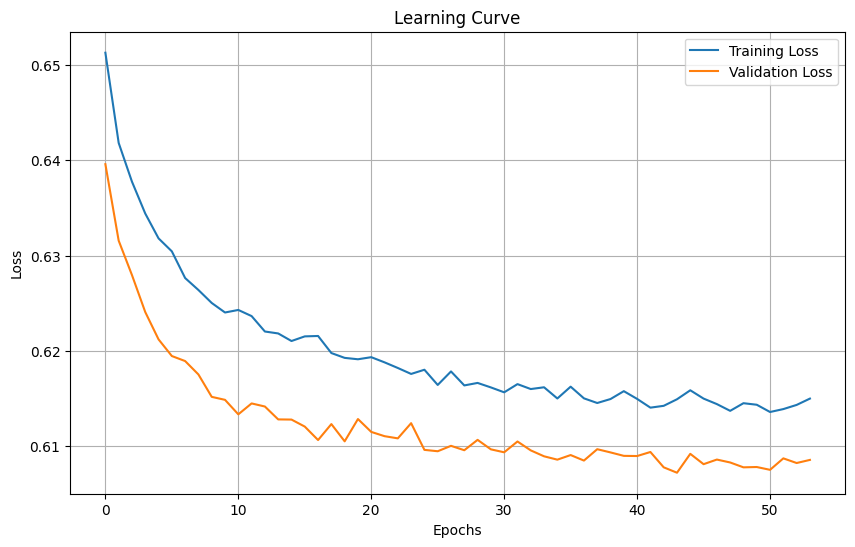

In [59]:
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt

# Early stopping parameters
x_train = data['mean_embedding']
x_val = valid['mean_embedding']
y_val = valid['Sentiment']
y_train = data['Sentiment']
    
x_train = np.vstack(x_train).astype(np.float32)
x_val = np.vstack(x_val).astype(np.float32)
    
    
y_val = y_val.values
y_train = y_train.values
    

data_set = Data(x_train, y_train, input_dim)
trainloader = DataLoader(dataset=data_set, batch_size=b_size, shuffle=True)
val_dataset = Data(x_val, y_val, input_dim)
val_loader = DataLoader(dataset=val_dataset, batch_size=b_size, shuffle=True)

# Early stopping parameters
patience = 10
best_val_loss = float('inf')
epochs_no_improve = 0
n_epochs = 300

# Learning rate scheduler
scheduler = StepLR(optimizer, step_size=1, gamma=0.95)
train_loss_list = []
val_loss_list = []

for epoch in range(n_epochs):
    model.train()  # Set the model to training mode
    train_loss = 0.0
    for x, y in trainloader:
        optimizer.zero_grad()
        z = model(x)  # Forward pass
        loss = criterion(z, y)
        loss.backward()
        # Gradient clipping (optional, choose max_norm value appropriately)
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        
        train_loss += loss.item()

        
    train_loss /= len(trainloader)
    train_loss_list.append(train_loss)
    # Validation phase
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_loss = 0
        for x_val_batch, y_val_batch in val_loader:
            z_val = model(x_val_batch)
            val_loss += criterion(z_val, y_val_batch).item()


    # Early stopping check
    val_loss /= len(val_loader)
    val_loss_list.append(val_loss)
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve == patience:
            print(f"Early stopping triggered at epoch {epoch}")
            break

    scheduler.step()  # Adjust learning rate

# Final model evaluation
x_val_tensor = torch.from_numpy(x_val)
z_val = model(x_val_tensor)
max_indexes = torch.argmax(z_val, dim=1)
y_pred = max_indexes.numpy()
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the results
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1 Score: {f1:.5f}')


plt.figure(figsize=(10, 6))
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


ROC curves

Early stopping triggered at epoch 26
Accuracy: 0.39774
Precision: 0.40407
Recall: 0.39774
F1 Score: 0.38879


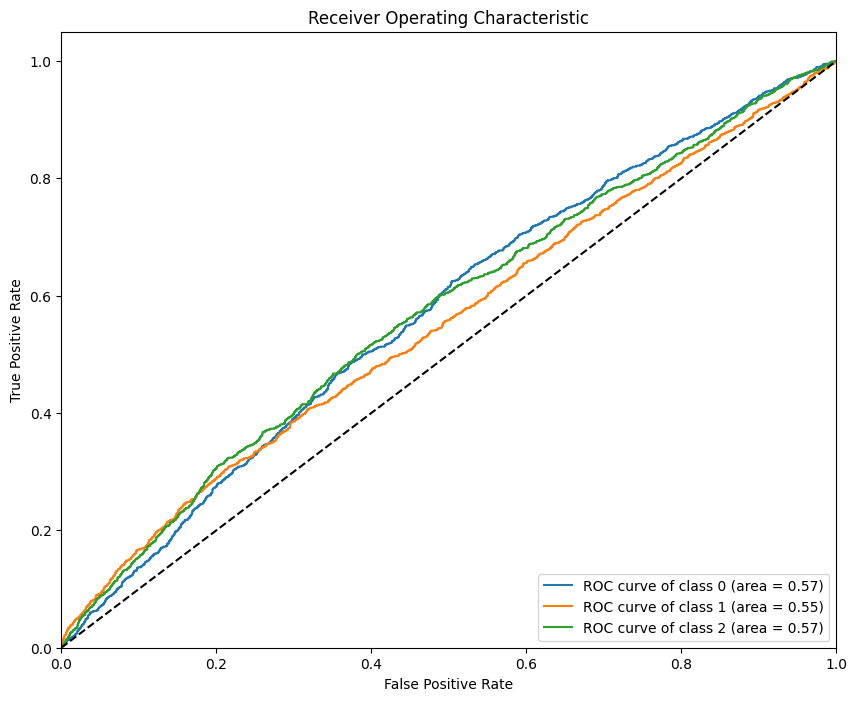

In [60]:
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt

# Early stopping parameters
x_train = data['mean_embedding']
x_val = valid['mean_embedding']
y_val = valid['Sentiment']
y_train = data['Sentiment']
    
x_train = np.vstack(x_train).astype(np.float32)
x_val = np.vstack(x_val).astype(np.float32)
    
    
y_val = y_val.values
y_train = y_train.values
    

data_set = Data(x_train, y_train, input_dim)
trainloader = DataLoader(dataset=data_set, batch_size=b_size, shuffle=True)
val_dataset = Data(x_val, y_val, input_dim)
val_loader = DataLoader(dataset=val_dataset, batch_size=b_size, shuffle=True)

# Early stopping parameters
patience = 10
best_val_loss = float('inf')
epochs_no_improve = 0
n_epochs = 300

# Learning rate scheduler
scheduler = StepLR(optimizer, step_size=1, gamma=0.95)
train_loss_list = []
val_loss_list = []

for epoch in range(n_epochs):
    model.train()  # Set the model to training mode
    train_loss = 0.0
    for x, y in trainloader:
        optimizer.zero_grad()
        z = model(x)  # Forward pass
        loss = criterion(z, y)
        loss.backward()
        # Gradient clipping (optional, choose max_norm value appropriately)
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        
        train_loss += loss.item()

        
    train_loss /= len(trainloader)
    train_loss_list.append(train_loss)
    # Validation phase
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_loss = 0
        for x_val_batch, y_val_batch in val_loader:
            z_val = model(x_val_batch)
            val_loss += criterion(z_val, y_val_batch).item()


    # Early stopping check
    val_loss /= len(val_loader)
    val_loss_list.append(val_loss)
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve == patience:
            print(f"Early stopping triggered at epoch {epoch}")
            break

    scheduler.step()  # Adjust learning rate

# Final model evaluation
x_val_tensor = torch.from_numpy(x_val)
z_val = model(x_val_tensor)
max_indexes = torch.argmax(z_val, dim=1)
y_pred = max_indexes.numpy()
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the results
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1 Score: {f1:.5f}')



softmax = nn.Softmax(dim=1)
probabilities = softmax(z_val)

from sklearn.preprocessing import label_binarize

# Binarize the labels
y_val_binarized = label_binarize(y_val, classes=np.unique(y_val))
n_classes = y_val_binarized.shape[1]

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_binarized[:, i], probabilities.detach().numpy()[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

For the ROC curves I converted them to binary form so True Positive Rate equal to 1 is the ideal while 0.5 is random guessing. We see that the scores are close to random guessing

Cnfusion Matrix

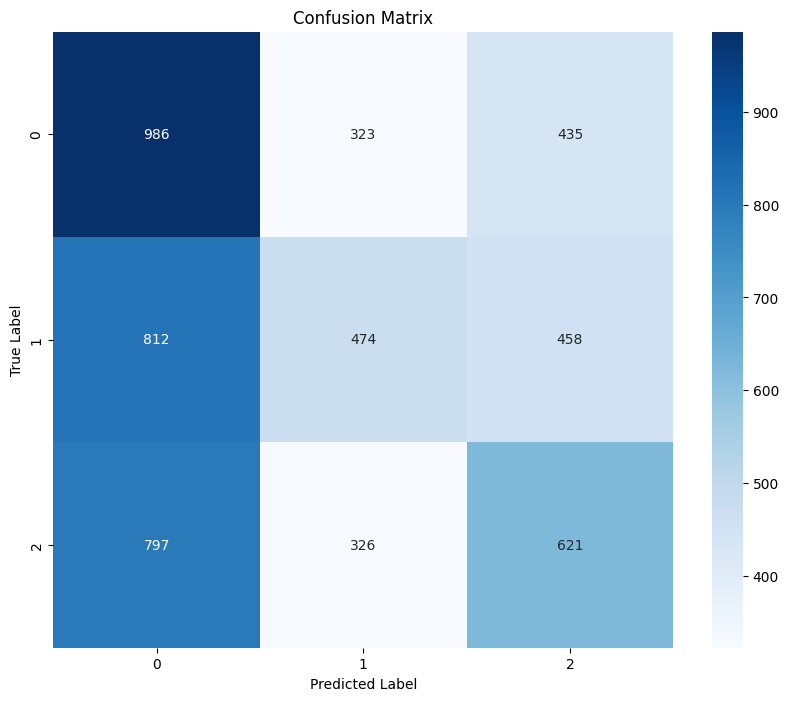

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Ok we now proceed with calcualting the output, first of all we load the test set and pre-process it

In [62]:
test_path = "/kaggle/input/ys19-2023-assignment-2/test_set.csv"
test = pd.read_csv(test_path)
test['Text'] = test['Text'].apply(lambda x: x.lower())
greek_stopwords = [
    'και', 'το', 'η', 'της', 'του', 'τα', 'σε', 'με', 'για', 'ειναι',
    'στο', 'απο', 'που', 'οι', 'την', 'ενα', 'μετα', 'εχει', 'δεν',
    'ειναι', 'μια', 'αυτο', 'εναν', 'αλλα', 'ο', 'μη', 'οτι', 'πως',
    'απο', 'στην', 'στον', 'τι', 'αυτη', 'των', 'αυτα', 'οταν', 'πολυ',
    'μας', 'ειναι', 'πριν', 'οτι', 'μονο', 'αυτος', 'τοτε', 'μεταξυ',
    'πολλα', 'οποτε', 'παρα', 'εαν', 'γυρω', 'αυτην', 'εκεινος', 'περισσοτερο',
    'προς', 'πολυ', 'τελικα', 'ολοι'
]
def remove_stopwords(text):
    words = text.split()  # Split the text into words
    words = [word for word in words if word.lower() not in greek_stopwords]
    return ' '.join(words)
test['Text'] = test['Text'].apply(remove_stopwords)
url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
def remove_urls(text):
    return re.sub(url_pattern, '', text)
test['Text'] = test['Text'].apply(remove_urls)
test['Text'] = test['Text'].apply(lambda x: re.sub('ό', 'ο', x))  
test['Text'] = test['Text'].apply(lambda x: re.sub('έ', 'ε', x))  
test['Text'] = test['Text'].apply(lambda x: re.sub('ί', 'ι', x))  
test['Text'] = test['Text'].apply(lambda x: re.sub('ή', 'η', x))  
test['Text'] = test['Text'].apply(lambda x: re.sub('ύ', 'υ', x))  
test['Text'] = test['Text'].apply(lambda x: re.sub('ώ', 'ω', x))  
test['Text'] = test['Text'].apply(lambda x: re.sub('ά', 'α', x))  
test['Text'] = test['Text'].apply(lambda x: re.sub('ς', 'σ', x))  

from greek_stemmer import stemmer

# Define a function to perform stemming on the tweets
def stem_greek_text(text):
    words = text.split()
    stemmed_words = [stemmer.stem_word(word,"NNN") for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text


# Apply the stem_greek_text function to the 'tweets' column
test['Text'] = test['Text'].apply(stem_greek_text)
test['Text'] = test['Text'].apply(lambda x: x.lower())
test['Text'] = test['Text'].str.replace('ς', 'σ')
test['Text'] = test['Text'].apply(lambda x: re.sub(r'[^A-Za-zΑ-Ωα-ω0-9 ]', lambda y: ' ' + y.group(0) + ' ', x))
test['Text'] = test['Text'].apply(lambda x: re.sub(r'\s+', ' ', x))
print(test.head(10))

   New_ID                                               Text   Party
0       1  κυριακ μητσοτακ ξερ εινα μουσει βεργιν μεσω χρ...      ND
1       2  συνεντευξ υποψηφι βουλευτ τ νε δημοκρατι βορει...      ND
2       3  αυτ τ εκλογ μαθητ φοιτητ ψηφιζουμ τ ιδι τροπ α...     KKE
3       4  γεννηματα : κιναλ θ γιν δεκανικ κανενοσ . ενδι...   PASOK
4       5  κυριακ εκλογων , οκτωβρ 1993 , ξημερωμ δευτερα...      ND
5       6   @ rounick28 @ yanisvaroufakis γιανν εινα σαν ...    DIEM
6       7      τσιπρ τελειωνε ! θελ να πα να μαγειρεψ # σκαι  SYRIZA
7       8  αποδημ κατα τσιπρ δικαιωμ ψηφου : « ητ δικαι κ...  SYRIZA
8       9  μητσοτακ realfm ελληνικο : ακατανοητ εκδοσ κοι...      ND
9      10  βουλωσ κοσιωνη . αφησ τ να τελειωσ προταση . α...  SYRIZA


create the model by concatenating valdiation and train set 

In [63]:
class Data(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim

    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]

    def __len__(self):
        return self.len

class Net(nn.Module):
    def __init__(self, D_in, H, D_out, negative_slope=0.01, dropout_rate=0.5):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.bn1 = nn.BatchNorm1d(H)
        self.dropout = nn.Dropout(dropout_rate)
        self.linear2 = nn.Linear(H, D_out)
        self.negative_slope = negative_slope

    def forward(self, x):
        # Using LeakyReLU instead of ReLU
        x = F.leaky_relu(self.bn1(self.linear1(x)), self.negative_slope)  # default slope is 0.01
        x = self.dropout(x)
        x = self.linear2(x)
        return x
input_dim = 161
hidden_dim = 10
window_size = 3
b_size = 85
learning_rate = 0.021794863937645848
negative_slope = 0.2996496033775225
dropout_rate = 0.20289531425438015
criterion=nn.MultiMarginLoss()
model = Net(input_dim, hidden_dim, output_dim, negative_slope=negative_slope, dropout_rate=dropout_rate)
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)  
num_cores = multiprocessing.cpu_count()
all_sentences = data['tokenized_text'].tolist() + valid['tokenized_text'].tolist()
combined_data = pd.concat([data, valid]).reset_index(drop=True)

word2vec_model = Word2Vec(sentences=all_sentences, vector_size=input_dim, window=window_size, min_count=1, workers=num_cores)
combined_data['mean_embedding'] = combined_data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))

In [64]:
test['tokenized_text'] = test['Text'].apply(word_tokenize)
test['mean_embedding'] = test['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
test.head()

,New_ID,Text,Party,tokenized_text,mean_embedding
0,1,κυριακ μητσοτακ ξερ εινα μουσει βεργιν μεσω χρ...,ND,"[κυριακ, μητσοτακ, ξερ, εινα, μουσει, βεργιν, ...","[0.019847427, 0.28127038, -0.04799003, 0.71826..."
1,2,συνεντευξ υποψηφι βουλευτ τ νε δημοκρατι βορει...,ND,"[συνεντευξ, υποψηφι, βουλευτ, τ, νε, δημοκρατι...","[0.12289075, 1.0646344, 0.21053067, 0.58882856..."
2,3,αυτ τ εκλογ μαθητ φοιτητ ψηφιζουμ τ ιδι τροπ α...,KKE,"[αυτ, τ, εκλογ, μαθητ, φοιτητ, ψηφιζουμ, τ, ιδ...","[0.4198154, 1.2252374, -0.029565567, 0.3218158..."
3,4,γεννηματα : κιναλ θ γιν δεκανικ κανενοσ . ενδι...,PASOK,"[γεννηματα, :, κιναλ, θ, γιν, δεκανικ, κανενοσ...","[0.10063398, 0.83261377, -0.22353573, 0.447583..."
4,5,"κυριακ εκλογων , οκτωβρ 1993 , ξημερωμ δευτερα...",ND,"[κυριακ, εκλογων, ,, οκτωβρ, 1993, ,, ξημερωμ,...","[0.21022655, 1.0172827, -0.20325536, 0.3264842..."


In [65]:
from torch.optim.lr_scheduler import StepLR
x_train = combined_data['mean_embedding']
y_train = combined_data['Sentiment']
x_train = np.vstack(x_train).astype(np.float32)
y_train = y_train.values
data_set = Data(x_train, y_train, input_dim)
trainloader = DataLoader(dataset=data_set, batch_size=b_size, shuffle=True)

x_test = test['mean_embedding']
x_test = np.vstack(x_test).astype(np.float32)
n_epochs = 45
scheduler = StepLR(optimizer, step_size=1, gamma=0.95)

for epoch in range(n_epochs):
    model.train()
    for x, y in trainloader:
        optimizer.zero_grad()
        z = model(x) 
        loss = criterion(z, y)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
    scheduler.step()

x_test_tensor = torch.from_numpy(x_test)
z_val = model(x_test_tensor)
max_indexes = torch.argmax(z_val, dim=1)
y_pred = max_indexes.numpy()

In [66]:
label_mapping = {0: 'NEGATIVE', 1: 'NEUTRAL', 2: 'POSITIVE'}
string_labels = [label_mapping[label] for label in y_pred]
result_df = pd.DataFrame({ 'Id' : test['New_ID'],'Predicted': string_labels})
result_df

,Id,Predicted
0,1,NEGATIVE
1,2,POSITIVE
2,3,POSITIVE
3,4,POSITIVE
4,5,NEGATIVE
...,...,...
10465,10466,NEGATIVE
10466,10467,NEGATIVE
10467,10468,NEGATIVE
10468,10469,NEGATIVE


In [67]:
result_df.to_csv("submission.csv", index=False)